# Differentiating Real and AI Generated Images

**Group Name**: Distinction Team\
**Mentor**: Peiyu Tang

Full Name | zID
:- | :-:
Aaron Liu | z5479623
Silvia | z5386349
Tsz Lik Wong | z5304797
Tong Ju | z5469333
Will Ren | z5429870

# Contents

[1. Problem Statement](#scrollTo=9S_-i14q7RgY)

[2. Data Sources](#scrollTo=nDqygemG7RgZ)

>[2.1 CIFAKE](#scrollTo=jQYBvTtD7RgZ)

>[2.2 ArtiFact](#scrollTo=mz_v_Ykn7RgZ)

[3. Exploratory Analysis](#scrollTo=rCsLK4_a7RgZ)

>[3.1 CIFAKE](#scrollTo=VFBnkSJH7Rga)

>[3.2 ArtiFact](#scrollTo=AXkhTf-T7Rga)

>>[3.2.1 Pre-processing](#scrollTo=yqP08dCn7Rga)

[4. Traditional Model](#scrollTo=E2pFf8s77Rgb)

>[4.1 Traditional Models (MLP) for the CIFake Dataset](#scrollTo=qee7lBUE7Rgb)

>[4.2 Traditional Models for the Artifact dataset (MLP)](#scrollTo=03553Lvl7Rgd)

>>[4.2.1 Traditional Model With One Hidden Layer](#scrollTo=xoenr1OFq2oo)

>>[4.2.2 Traditional Model With Two Hidden Layers](#scrollTo=6KEi2Ung7Rgd)

>>[4.2.3 Combining Findings](#scrollTo=oF6Y2L-M7Rgr)

[5. Shallow CNN](#scrollTo=6617b67e)

>[5.1 Our architecture for CIFAKE dataset](#scrollTo=b27b4f87)

>[5.2 Training and results of shallow CNN](#scrollTo=ff4d4998)

>[5.3 GradCAM for CIFAKE](#scrollTo=8127be02)

>[5.4 Discussion on gradCAM results](#scrollTo=46f45bfc)

>[5.5 Using CNN and GradCAM in Face dataset(Real vs styleGAN)](#scrollTo=799a5fb5)

>[5.6 Discussion on GradCAM results for faces](#scrollTo=f391afb2)

>[5.7 Discussion on Shallow CNN](#scrollTo=d8f9c4a2)

[6. Pre-trained models](#scrollTo=NGgfmJUz7Rgv)

>[6.1 ViT for Multi-Generators](#scrollTo=2EY6TzTn7Rgv)

>[6.2 ViT Testing Unseen Generator](#scrollTo=D9wHpagO7Rgx)

>[6.3 Training Other Pre-trained Models for Multi-Generators](#scrollTo=5e3be875)

>>[6.3.1  General settings for model training](#scrollTo=221507b6)

>>[6.3.2 Training RseNet50](#scrollTo=9d299bbd)

>>[6.3.3 Training InceptionV3](#scrollTo=4416eede)

>>[6.3.4 Training EffecientNet](#scrollTo=30101661)

>>[6.3.5 Training  ViT Model](#scrollTo=e4db9638)

>>[6.3.6 Training VGG19](#scrollTo=c42beac0)

>[6.4 Feature Extraction](#scrollTo=b63c6e2a)

>[6.5 Classification by using extracted features](#scrollTo=eb34e8a1)

>>[6.5.1 Validation of Resnet50 extracted features by using SVM](#scrollTo=3ced7045)

>>[6.5.2 Validation of InceptionV3 extracted features](#scrollTo=c59f83da)

>>[6.5.3 Validation of ViT extracted features](#scrollTo=a5d2dce0)

>>[6.5.4 SVM classification by using features extracted from ViT and ResNet50](#scrollTo=39c50bd4)

>>[6.5.5 SVM classification by using features extracted from ResNet50 and InceptionV3](#scrollTo=59b746c4)

>>[6.5.6 Feature Optimization](#scrollTo=6b9e8d1b)

[7. Conclusion](#scrollTo=518db7aa)

[8. Bibliography](#scrollTo=KGH2BtCE7Rg9)



# 1. Problem Statement

With recent advances in generative AI models like DALL-E and Stable Diffusion, it is now possible to generate highly realistic synthetic images that can be difficult to distinguish from real one. However, the proliferation of synthesized media has raised concerns about potential misuse, such as the creation of fake news, forged identity documents, and so on. This phenomenon can be observed recently in the real world, where fake images of explosions in Jerusalem is mixed with actual photos of the Dome of the Rock and people in Gaza [(Fox, 2023)](#fox-2023). In another case, six individuals were apprehended by Hong Kong police for using deepfake technology to secure loans [(Lo, 2023)](#lo-2023).

<center>
  <figure>
    <img src="https://drive.google.com/uc?export=view&id=1aXmJu7qCSui9M6r0eEhpWlGkMApo5a8g" width="800">
    <figcaption>Fake images of explosions in Jerusalem mingle with real photos of the Dome of the Rock and people in Gaza (found in Adobe and iStock) <a href="#fox-2023">(Fox, 2023)</a>.</figcaption>
  </figure>
</center>

Therefore, there is a need for a reliable technique to differentiate real images from AI generated ones in order to detect these manipulated content. We aim to develop a model that can accurately classify an image as either genuine or synthesized, in order to help maintain trust in online multimedia as generative AI continues to advance.

# 2. Data Sources

## 2.1 CIFAKE

The CIFAKE dataset is comprised of synthetic images alongside real images, the latter of which have been sourced from CIFAR-10 [(Krizhevsky, 2009)](#kriz-). This dataset is utilized to investigate the feasibility of using computer vision techniques for distinguishing between authentic and AI-generated images [(Bird et al., 2023)](#bird-2023).

CIFAKE dataset can be found at https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images.\
CIFAR-10 can be found at https://www.cs.toronto.edu/~kriz/cifar.html.

## 2.2 ArtiFact

The ArtiFact dataset is an extensive collection of images designed to encompass a wide range of real and synthetic visuals spanning various categories, such as Human/Human Faces, Animal/Animal Faces, Places, Vehicles, Art, and numerous other everyday objects [(Md Awsafur Rahman et al., 2023)](#rahman-2023).

ArtiFact dataset can be found at https://www.kaggle.com/datasets/awsaf49/artifact-dataset.

# 3. Exploratory Analysis

## 3.1 CIFAKE

The CIFAKE contains a total of 110 MB of data, comprising 60,000 synthetically generated fake images using Stable Diffusion and 60,000 real images from the CIFAR-10 dataset, for a total of 120,000 images. These images were divided into a training set of 100,000 images and a test set of 20,000 images. The images are categorized into two classes: real and fake. Each individual image in the dataset has a resolution of 32x32 pixels stored in the JPEG format with RGB color channels. No pre-processing was performed on the images since the dataset is already well-organized into the two classes and contains a substantial size of 110 MB worth of data, making it suitable for training models to classify images as real or fake.

## 3.2 ArtiFact

The ArtiFact dataset is a large dataset totalling 32 GB in size. It contains over 1 million synthetically generated fake images from 25 different generators as well as more than 900k real images from 8 sources. Each dataset of fake and real images falls under varying classes with varying numbers of images. The images are categorized first by their generator or source dataset, then by category, sometimes including subcategories. Whether an image is real or fake can be determined from the metadata CSV files. To better reflect real-world conditions, the images have been downscaled and randomly cropped to a resolution of 200 by 200 pixels and stored in JPEG format with RGB color channels. Overall, the ArtiFact dataset provides a substantial and diverse collection of over 2 million images for training models to detect synthetic images across a wide range of generators and content classes.

### 3.2.1 Pre-processing

The raw ArtiFact dataset was too large at 32GB in size and inconsistently categorized across its wide range of image categories, generators, and sources. This made it challenging to directly use for training deepfake detection models. Therefore, pre-processing of the data was required. Specifically, the category of “faces" was selected for focus as it contained the most images for both fake and real across different sources. The facial category also provides images with a variety of realism levels that span a range of difficulty for human observers. Additionally, only 7 of the 25 generators present in ArtiFact that contained facial images were chosen. By concentrating on a single coherent category of faces generated by a subset of sources, the dataset size was reduced drastically from 32GB down to around 500MB while still maintaining diversity. This pre-processing aimed to make the ArtiFact dataset more streamlined and amenable for training models to distinguish between real and fake facial images.

The following are the final classes and properties that we have for this specific dataset that will be utilized throughout our project.

<table>
  <tr>
      <th>No.</th>
      <th>Generator (classes)</th>
      <th>Total size</th>
      <th>Train size</th>
      <th>Test size</th>
      <th>Level to distinguish by human eyes</th>
  </tr>
  <tr>
      <td>1</td>
      <td>Denoising Diffusion GAN</td>
      <td>10,000</td>
      <td>9,000</td>
      <td>1,000</td>
      <td>Medium</td>
  </tr>
  <tr>
      <td>2</td>
      <td>Gansformer</td>
      <td>5,000</td>
      <td>4,000</td>
      <td>1,000</td>
      <td>Medium</td>
  </tr>
  <tr>
      <td>3</td>
      <td>Palette</td>
      <td>6,000</td>
      <td>5,000</td>
      <td>1,000</td>
      <td>Medium</td>
  </tr>
  <tr>
      <td>4</td>
      <td>SFHQ</td>
      <td>10,000</td>
      <td>9,000</td>
      <td>1,000</td>
      <td>Medium</td>
  </tr>
  <tr>
      <td>5</td>
      <td>StyleGAN 1</td>
      <td>9,000</td>
      <td>8,000</td>
      <td>1,000</td>
      <td>Hard</td>
  </tr>
  <tr>
      <td>6</td>
      <td>CIPS</td>
      <td>4,800</td>
      <td colspan=2>Used as unseen generator</td>
      <td>Hard</td>
  </tr>
  <tr>
      <td>7</td>
      <td>Stable Diffusion</td>
      <td>2,443</td>
      <td colspan=2>Used as unseen generator</td>
      <td>Easy</td>
  </tr>
  <tr>
      <td>8</td>
      <td>Real</td>
      <td>10,000</td>
      <td>9,000</td>
      <td>1,000</td>
      <td>Real</td>
  </tr>
</table>

# 4. Traditional Model

### 4.1 Traditional Models (MLP) for the CIFake Dataset
- Has two classes, 'Real' and 'Fake'
- Recieves 32 by 32 RGB images

In [ ]:
import torch
import torch.utils.data
from torchvision import datasets, transforms
import torch.nn as nn
import timeit
import torch.nn.functional as F
from sklearn import metrics
import matplotlib.pyplot as plt

3 Hidden layers with 2,361,602 parameters
- uses RELU activation function for all hidden layers

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fullCon1 = nn.Linear(32*32*3, 512)
        self.fullCon2 = nn.Linear(512, 1024)
        self.fullCon3 = nn.Linear(1024, 256)
        self.fullCon4 = nn.Linear(256, 2)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fullCon1(x))
        x = F.relu(self.fullCon2(x))
        x = F.relu(self.fullCon3(x))
        x = self.fullCon4(x)
        return x


Normalising the image with mean and standard deviation values calculated off the ImageNet Dataset.

Batch size of 32 and 8 workers to maximise the use of the GPU

In [ ]:
def prepData(train_dir, val_dir):
    data_transforms = {
        'train': transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    train = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
    eval = datasets.ImageFolder(val_dir, transform=data_transforms['val'])

    train_loader = torch.utils.data.DataLoader(train, shuffle=True, pin_memory=True, batch_size=32, num_workers = 8)
    val_loader = torch.utils.data.DataLoader(eval, pin_memory=True, batch_size=32, num_workers = 8)
    return train_loader, val_loader

In [ ]:
def testModel(model, val_loader, device):
    model.eval()
    correct_val = 0
    total_val = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    return val_accuracy, true_labels, predicted_labels

In [ ]:
def main(trainDir, testDir, modelClass):
    start = timeit.default_timer()

    train_loader, val_loader = prepData(trainDir, testDir)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    if torch.cuda.is_available():
        print("GPU")


    model = modelClass.to(device)

    errFunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        total_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = errFunc(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)

            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            total_loss = total_loss + loss.item()

        train_accuracy = 100 * correct_train / total_train
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}, Training Accuracy: {train_accuracy:.2f}%")


    accuracy, true_labels, predicted_labels = testModel(model, val_loader, device)
    print(f"Validation Accuracy: {accuracy:.2f}%")
    conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
    if trainDir == "CIFakeTrain":
        colLabels = [True, False]
    else:
        colLabels = ["Denoising Diffusion", "Gansformer", "Pallete", "Real", "Sfhq", "Stylegan1"]
    cm = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=colLabels)
    # Print confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)
    cm.plot(xticks_rotation=90)
    plt.show()
    torch.save(model.state_dict(), 'testMLP.pth')
    stop = timeit.default_timer()
    print('Time: ', stop - start)

GPU
Epoch 1/10, Loss: 0.49735857151031493, Training Accuracy: 74.66%
Epoch 2/10, Loss: 0.41727449195861815, Training Accuracy: 80.36%
Epoch 3/10, Loss: 0.3841592182636261, Training Accuracy: 82.39%
Epoch 4/10, Loss: 0.3587632463765144, Training Accuracy: 83.94%
Epoch 5/10, Loss: 0.3379598887324333, Training Accuracy: 85.03%
Epoch 6/10, Loss: 0.3189226301383972, Training Accuracy: 85.99%
Epoch 7/10, Loss: 0.30340235229492185, Training Accuracy: 86.87%
Epoch 8/10, Loss: 0.28607794198036196, Training Accuracy: 87.67%
Epoch 9/10, Loss: 0.2711657341825962, Training Accuracy: 88.44%
Epoch 10/10, Loss: 0.2551744524037838, Training Accuracy: 89.22%
Validation Accuracy: 85.16%
Confusion Matrix:
[[8806 1194]
 [1775 8225]]


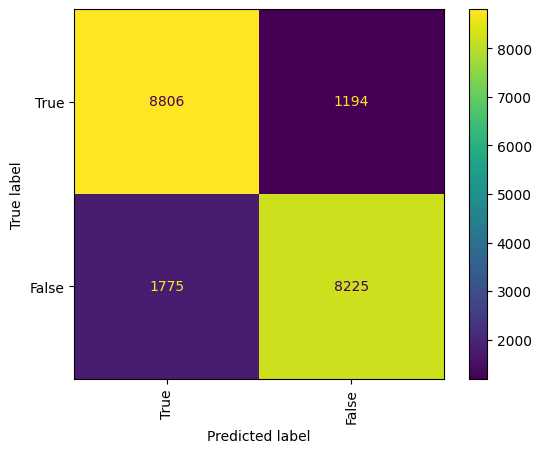

Time:  398.6906894999847


In [ ]:
if __name__ == "__main__":
    main("./CIFakeTrain", "./CIFakeTest", MLP())


This shows that the models predictions of each class is fairly balanced, correctly predicting Real and Fake images at a similar rate.

## 4.2 Traditional Models for the Artifact dataset (MLP)


### 4.2.1 Traditional Model With One Hidden Layer
An experimentation to find the optimal number of nodes in each layer to achieve the highest validation accuracy in MLP networks with one and two hidden layers.


Below is a one hidden layer network. We experimented with the following values for `numNodes`: `200, 400, 600, 800, 1000, 1200, 1400`

In [ ]:
class OneHidLayArtifact(nn.Module):
    def __init__(self):
        super(OneHidLayArtifact, self).__init__()
        numNodes = 1200
        self.fullCon1 = nn.Linear(200*200*3, numNodes)
        self.fullCon3 = nn.Linear(numNodes, 6)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fullCon1(x))
        x = (self.fullCon3(x))
        return x

When tested with the values above, it was found that with 800 nodes in the hidden layer, the model achieved its highest validation accuracy.

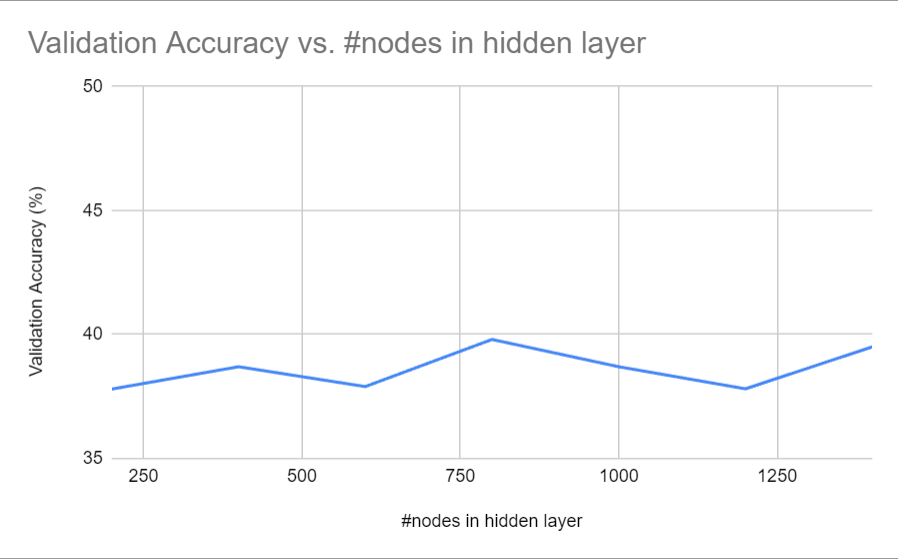

However, the plot appears to oscilate with the node counts. We theorised that this may be due to the model's getting stuck in a local minimum that depends on the number of nodes in the hidden layer, which causes this pattern.

The model was trained and tested the same way as the CIFake model:

GPU
Epoch 1/10, Loss: 1.5669654825817454, Training Accuracy: 38.54%
Epoch 2/10, Loss: 1.4607849921313198, Training Accuracy: 42.49%
Epoch 3/10, Loss: 1.4328538220578975, Training Accuracy: 44.42%
Epoch 4/10, Loss: 1.4001914209019055, Training Accuracy: 45.86%
Epoch 5/10, Loss: 1.3856845449967818, Training Accuracy: 46.65%
Epoch 6/10, Loss: 1.3581372672427785, Training Accuracy: 48.20%
Epoch 7/10, Loss: 1.3421070657209917, Training Accuracy: 48.87%
Epoch 8/10, Loss: 1.3177915063771335, Training Accuracy: 49.88%
Epoch 9/10, Loss: 1.3030082481557672, Training Accuracy: 51.27%
Epoch 10/10, Loss: 1.2820069633397189, Training Accuracy: 51.94%
Validation Accuracy: 39.80%
Confusion Matrix:
[[445  37 118 217 107  76]
 [131 138  66 310 135 220]
 [305  36 199 234 139  87]
 [116  72  62 432 143 175]
 [ 46  10   9  77 832  26]
 [106  72  59 262 159 342]]


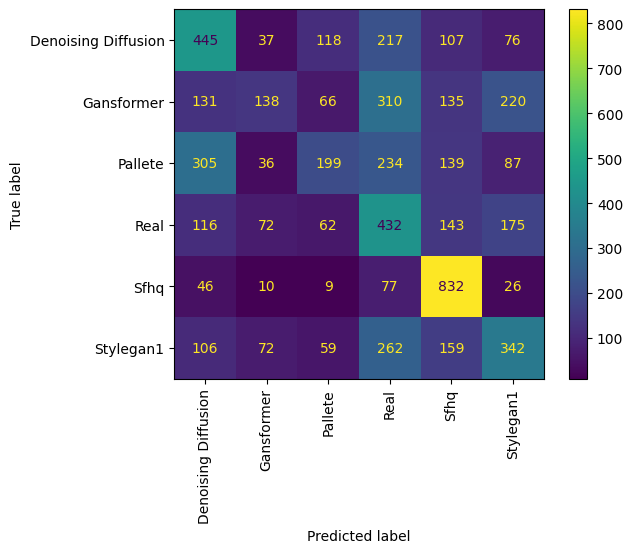

Time:  496.59725409999373


In [ ]:
if __name__ == "__main__":
    main("./Artifact/Face/Train", "./Artifact/Face/Test", OneHidLayArtifact())

The confusion matrix shows that the model commonly misclassifies `Real` images with `StyleGan` images. This is mostly due to how proficient `StyleGan` is at generating photo realistic images. The model classified 43% of `Real` images correctly, and 78% of 'Fake' images correctly when treating all generator classes as one 'Fake' class. But when classifying the individual generators, there was an accuracy of only 39%. The large gap in accuracies between the model classifying `Real` and Fakes is likely due to the disproportionate number of real and generated images in the dataset, with 5000 generated and 1000 real. This causes the model to become biased to classify all images as anything but the `Real` class. This can be mitigated by changing haiving equal real and generated images in the dataset, however our focus in this scenario was testing the model on identifying individual generators.

### 4.2.2 Traditional Model With Two Hidden Layers

Below is a two hidden layer network. To find the optimal node counts, we initially kept numNodes2 constant at a random number and we had numNodes1 as the independent variable to be changed. the random number of numNodes2 was 1352, and we tested the values `500, 1024, 1500, 2048, 2500, 3076, 4096` for numNodes1

In [ ]:
class TwoHidLayArtifactHL1(nn.Module):
    def __init__(self):
        super(TwoHidLayArtifactHL1, self).__init__()
        numNodes1 = 2048
        self.fullCon1 = nn.Linear(200*200*3, numNodes1)
        self.fullCon2 = nn.Linear(numNodes1, 1352)
        self.fullCon3 = nn.Linear(1352, 6)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fullCon1(x))
        x = F.relu(self.fullCon2(x))
        x = self.fullCon3(x)
        return x

The model was trained and tested the same way as CIFake

In [ ]:
if __name__ == "__main__":
    main("./Face (1)/Face/Train", "./Face (1)/Face/Test", TwoHidLayArtifactHL1())

Testing those above values found that having 2048 nodes in the first hidden layer gave the best validation accuracy, at 45.5%.

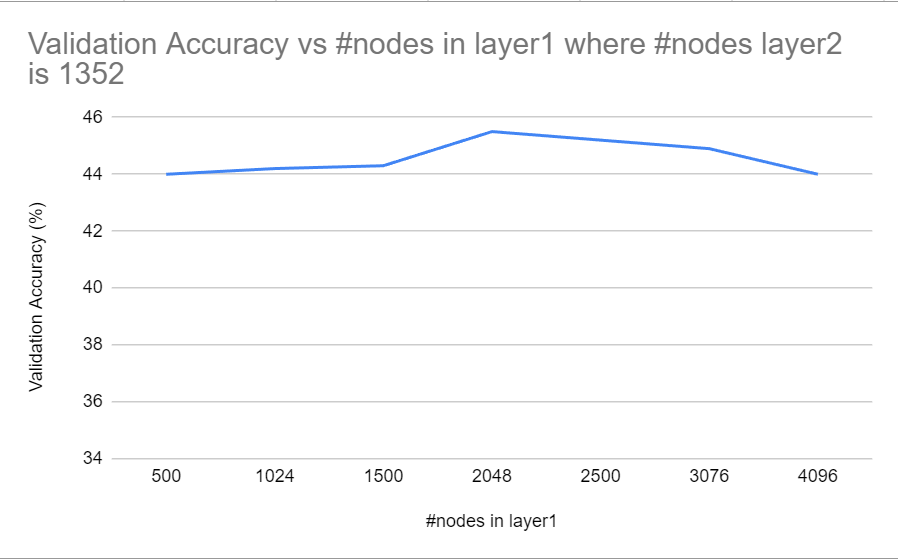

This shows that the validation peaks at 45.5% at 2048 nodes in layer 1.

Now that we know that the optimal validation accuracy can be achieved with 2048 nodes in layer 1, we created a new model with hidden layer 1 set constant at 2048, and we made the node count in hidden layer 2 the independent variable. We tested the on layer 2 the values: `500, 1024, 1500, 2048, 2500, 3076, 4096`.

In [ ]:
class TwoHidLayArtifactHL2(nn.Module):
    def __init__(self):
        super(TwoHidLayArtifactHL2, self).__init__()
        numNodes2 = 1500
        self.fullCon1 = nn.Linear(200*200*3, 2048)
        self.fullCon2 = nn.Linear(2048, numNodes2)
        self.fullCon3 = nn.Linear(numNodes2, 6)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fullCon1(x))
        x = F.relu(self.fullCon2(x))
        x = self.fullCon3(x)
        return x

Testing those values revealed that `1500` nodes in hidden layer 2 would result in an optimal validation accuracy of 46%.

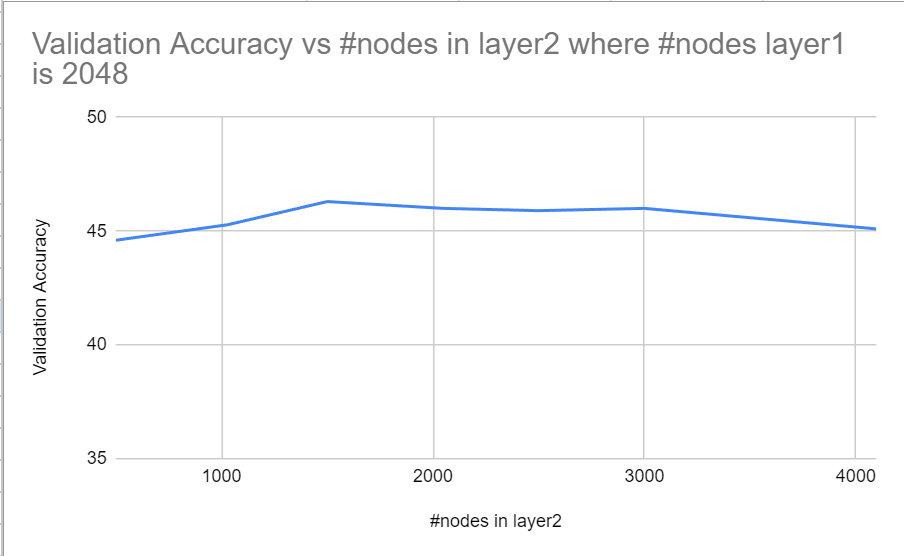

This accuracy is not noticibly more significant that the previous experiment's with hidden layer 1 as the independent variable, as when choosing a random number, `1352` was coincidentally close to the `1500` number discovered in this experiment. Thus, with identical hidden layer 1's and a very similar number of nodes in hidden layer 2, they achieved a similar accuracy.

### 4.2.3 Combining Findings

Combining the findings from the past two experiments into a model with 2048 nodes in hidden layer 1 and 1500 nodes in hidden layer 2 and running it as follows:

In [ ]:
class TwoHidLayArtifactCombined(nn.Module):
    def __init__(self):
        super(TwoHidLayArtifactCombined, self).__init__()
        self.fullCon1 = nn.Linear(200*200*3, 2048)
        self.fullCon2 = nn.Linear(2048, 1500)
        self.fullCon3 = nn.Linear(1500, 6)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fullCon1(x))
        x = F.relu(self.fullCon2(x))
        x = self.fullCon3(x)
        return x

Running and testing it:

GPU
Epoch 1/10, Loss: 1.4937106714248658, Training Accuracy: 39.96%
Epoch 2/10, Loss: 1.364303467100317, Training Accuracy: 45.80%
Epoch 3/10, Loss: 1.2913035172115672, Training Accuracy: 48.86%
Epoch 4/10, Loss: 1.2357153334184126, Training Accuracy: 51.16%
Epoch 5/10, Loss: 1.18568346639113, Training Accuracy: 53.33%
Epoch 6/10, Loss: 1.136896870396354, Training Accuracy: 55.93%
Epoch 7/10, Loss: 1.08493147130446, Training Accuracy: 57.60%
Epoch 8/10, Loss: 1.0421662190177223, Training Accuracy: 59.66%
Epoch 9/10, Loss: 0.9883767319592562, Training Accuracy: 61.72%
Epoch 10/10, Loss: 0.9388437370820479, Training Accuracy: 64.03%
Validation Accuracy: 45.82%
Confusion Matrix:
[[559  54  90 156  59  82]
 [151 242  42 238  49 278]
 [372  50 227 199  53  99]
 [133  92  69 424  71 211]
 [ 50  22  17  56 808  47]
 [124  83  35 216  53 489]]


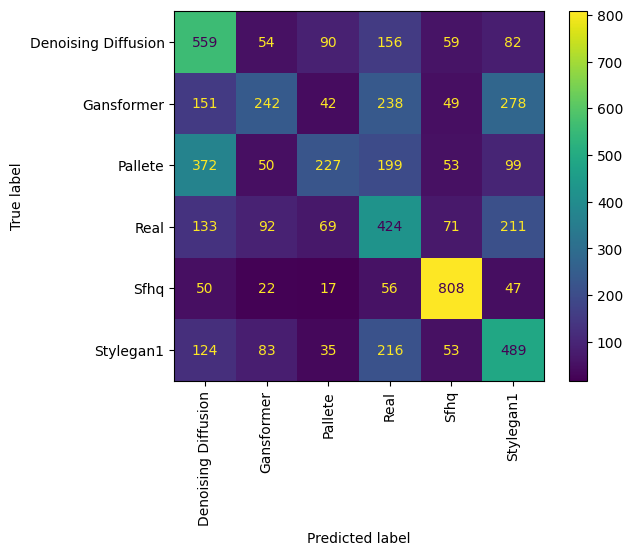

Time:  532.7393227999855


In [ ]:
if __name__ == "__main__":
    main("./Face (1)/Face/Train", "./Face (1)/Face/Test", TwoHidLayArtifactCombined())

Despite having the same parameters as the experiments for layer 2, it achieved an accuracy of 45.8%, which is lower that 46%. This could be due to the setting of random starting weights and biases causing its performance to fluctuate slightly.

Through the confusion matrix, it can be seen that it follows a similar pattern as the single hidden layer network for Artifact, where the model is inclined to classify all images as being from a generator, classifying 42% of `Real` images correctly, and 83% of 'Fake' images correctly, when treating all generator classes as on 'Fake' class. For classifying the individual generators, it achieved an accuracy of 46.5%.

It is interesting to see that the true positives for `Real` images has dropped slightly, even with the overall model accuracy having a 6% improvement. This is partially due to the model being able to better recognise the patterns of `Stylegan1`, as seen in the significant increase in overall predictions for `Stylegan1`, and it this is also seen to a lesser extent for the other generators.

By experimenting with node counts in models with 2 hidden layers by fixing layer 2, finding an optimal node count in layer 1, then fixing layer 1 and finding an optimal node count for layer 2, we hope to develop a systematic method for finding the ideal node counts for each hidden layer in other neural networks' fully connected layers.

# 5. Shallow CNN

We think CNN could be a good method in handling this problem because:
1. CNN utilize 2D spatial information of image data.​
2. CNN automatically detect important features without human supervision.​
3. CNN helps uncovering features that human don't pay attention on in Real v.s. Fake task.​
4. CNN is good with hierarchical features.

## 5.1 Our architecture for CIFAKE dataset
![<caption>](https://drive.google.com/uc?export=view&id=1I2gENaHn4VtAHd3ruUwBmOayC_X8Jtou)

Model Elements:
    
Convolutional layer followed by ReLU activation: feature extraction​

Pooling layer: reduce image dimension for feature representation in different scale​

Fully connected layer: collect information and make predictions

In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import cv2
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

**Custom dataset definition**

In [ ]:
class CIFAKEDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = plt.imread(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


Define train and test function to be used later

In [ ]:
# Using code from assignment 1 and adjusted some lines to fit our dataset and evaluations.
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    conf_matrix = np.zeros((2,2)) # initialize confusion matrix
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            # determine index with maximal log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            # update confusion matrix
            conf_matrix = conf_matrix + metrics.confusion_matrix(
                          target.cpu(),pred.cpu(),labels=[0,1])
        # print confusion matrix
        np.set_printoptions(precision=4, suppress=True)
        print(type(conf_matrix))
        print(conf_matrix)

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return 100. * correct / len(test_loader.dataset), conf_matrix

In [ ]:
class NetConv(nn.Module):
    # two convolutional layers and one fully connected layer,
    # all using relu, followed by log_softmax
    # different architecture can be used
    def __init__(self):
        super(NetConv, self).__init__()
        self.conv1 = nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1,dilation=1)
        self.conv2 = nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1,dilation=1)
        self.linear = nn.Linear(in_features=128*8*8, out_features=50)
        self.output = nn.Linear(in_features=50, out_features=2)
        self.gradients = None
    #increasing kernel size help improving accuracy, increasing size not much
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.reshape(-1, 128*8*8)
        x = self.linear(x)
        x = F.relu(x)
        x = self.output(x)
        x = F.log_softmax(x, 1)
        return x

## 5.2 Training and results of shallow CNN

In [ ]:
training_data = CIFAKEDataset(
    annotations_file = "label.csv",
    img_dir="data",
    transform=transforms.ToTensor()
)

test_data = CIFAKEDataset(
    annotations_file = "label_test.csv",
    img_dir="test",
    transform=transforms.ToTensor()
)
labels_map = {
    0: "Real",
    1: "Fake",
}

In [ ]:
device = torch.device('cuda')
net = NetConv().to(device)
train_dataloader = DataLoader(training_data, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle=True)
if list(net.parameters()):
    # use SGD optimizer
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

    net.eval()

    all = []
    matrixs = []
    # training and testing loop and print test accuracy
    for epoch in range(1, 20 + 1):
        train(net, device, train_dataloader, optimizer, epoch)
        test_acc, conf_matrix =test(net, device, test_dataloader)
        all.append(test_acc)
        matrixs.append(conf_matrix)
        torch.save(net, f'weights{epoch}.pt') # Save the weights
    print(all)
    print(max(all))

Train Epoch: 1 [0/99999 (0%)]	Loss: 0.695521
Train Epoch: 1 [10000/99999 (10%)]	Loss: 0.683337
Train Epoch: 1 [20000/99999 (20%)]	Loss: 0.600104
Train Epoch: 1 [30000/99999 (30%)]	Loss: 0.610647
Train Epoch: 1 [40000/99999 (40%)]	Loss: 0.490669
Train Epoch: 1 [50000/99999 (50%)]	Loss: 0.448441
Train Epoch: 1 [60000/99999 (60%)]	Loss: 0.416498
Train Epoch: 1 [70000/99999 (70%)]	Loss: 0.413091
Train Epoch: 1 [80000/99999 (80%)]	Loss: 0.542003
Train Epoch: 1 [90000/99999 (90%)]	Loss: 0.428611
<class 'numpy.ndarray'>
[[8012. 1987.]
 [1764. 8236.]]

Test set: Average loss: 0.4164, Accuracy: 16248/19999 (81%)

Train Epoch: 2 [0/99999 (0%)]	Loss: 0.406556
Train Epoch: 2 [10000/99999 (10%)]	Loss: 0.480890
Train Epoch: 2 [20000/99999 (20%)]	Loss: 0.329613
Train Epoch: 2 [30000/99999 (30%)]	Loss: 0.460576
Train Epoch: 2 [40000/99999 (40%)]	Loss: 0.386834
Train Epoch: 2 [50000/99999 (50%)]	Loss: 0.556403
Train Epoch: 2 [60000/99999 (60%)]	Loss: 0.309234
Train Epoch: 2 [70000/99999 (70%)]	Loss: 0.

Train Epoch: 14 [40000/99999 (40%)]	Loss: 0.135302
Train Epoch: 14 [50000/99999 (50%)]	Loss: 0.077141
Train Epoch: 14 [60000/99999 (60%)]	Loss: 0.101924
Train Epoch: 14 [70000/99999 (70%)]	Loss: 0.157394
Train Epoch: 14 [80000/99999 (80%)]	Loss: 0.126599
Train Epoch: 14 [90000/99999 (90%)]	Loss: 0.056284
<class 'numpy.ndarray'>
[[9498.  501.]
 [ 601. 9399.]]

Test set: Average loss: 0.1424, Accuracy: 18897/19999 (94%)

Train Epoch: 15 [0/99999 (0%)]	Loss: 0.106147
Train Epoch: 15 [10000/99999 (10%)]	Loss: 0.139402
Train Epoch: 15 [20000/99999 (20%)]	Loss: 0.061579
Train Epoch: 15 [30000/99999 (30%)]	Loss: 0.118496
Train Epoch: 15 [40000/99999 (40%)]	Loss: 0.124561
Train Epoch: 15 [50000/99999 (50%)]	Loss: 0.127539
Train Epoch: 15 [60000/99999 (60%)]	Loss: 0.106202
Train Epoch: 15 [70000/99999 (70%)]	Loss: 0.156054
Train Epoch: 15 [80000/99999 (80%)]	Loss: 0.121692
Train Epoch: 15 [90000/99999 (90%)]	Loss: 0.067524
<class 'numpy.ndarray'>
[[9099.  900.]
 [ 312. 9688.]]

Test set: Averag

The best model seems to be in epoch 20

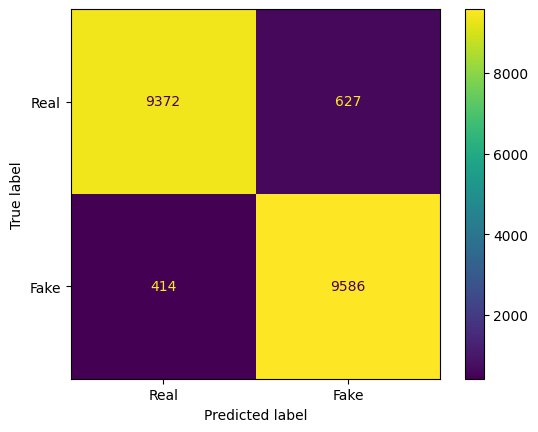

In [ ]:
#Select the best model for analysis
disp = ConfusionMatrixDisplay(confusion_matrix=matrixs[19],display_labels=["Real", "Fake"])
disp.plot(values_format=".0f")


Average Precision : (9372/(9372+414) + 9586/(9586+627)) / 2 = 0.948​

Average Recall : (9372/(9372+672) + 9586/(9586+414)) / 2 = 0.946​

Accuracy : 18958/19999 (94.8%)

**Our experiments on different architectures:**

![<caption>](https://drive.google.com/uc?export=view&id=1_kJDysQqrC6uI1RVMBl1UkKSMh2MKv8s)

This image shows that increasing the number of filters in each convolutional layer can lead to an increase in accuracy. Our interpretation is that more features can be encoded in these filters and thus the network can make a better prediction.

![<caption>](https://drive.google.com/uc?export=view&id=1TmHbPGYJsSsa5DkcMTVzW-Uk1sO8-GI2)

This image shows that increasing the number of nodes in the fully connected layer does not always improve performance, the reason behind this could be the complexity mismatch where there is too much information to compact to 2 output nodes.

## 5.3 GradCAM for CIFAKE

Using backward and forward hook on last convolutional layer

Utilizing gradients and activations

Identify relevant features for each class

There are two steps in calculating GradCAM.

$$\alpha^c_k = \frac{1}{Z}\sum_i\sum_j\frac{\partial y^c}{\partial A^k_{ij}}$$

This equation calculate the neuron improtance using gradients and activations which is normalized by global average pooling.

$$L^c_{Grad-CAM} = ReLU \left(\sum_k\alpha^c_kA^k \right)$$

This equation calcuate the forward activation and select those filters with positive influence only using ReLU.

In [ ]:
import PIL
from matplotlib import colormaps
from torchvision.transforms.functional import to_pil_image
net = torch.load('weights20.pt').to(device)
net.eval()
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
  global gradients
  gradients = grad_output

def forward_hook(module, args, output):
  global activations
  activations = output


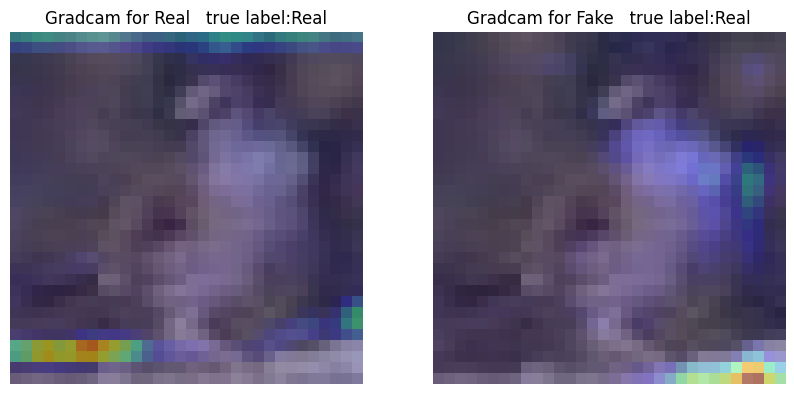

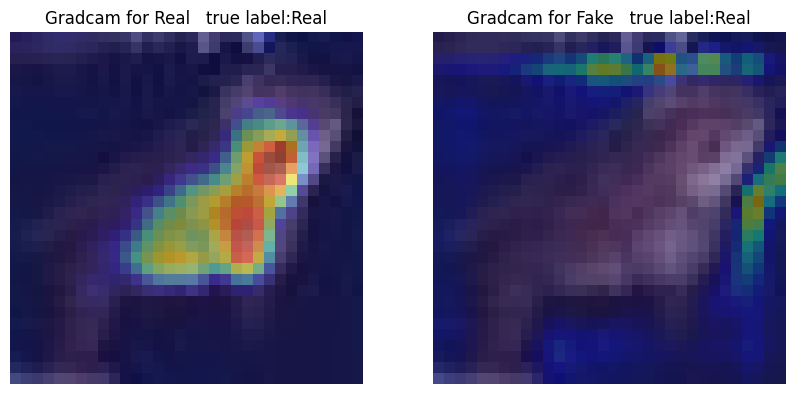

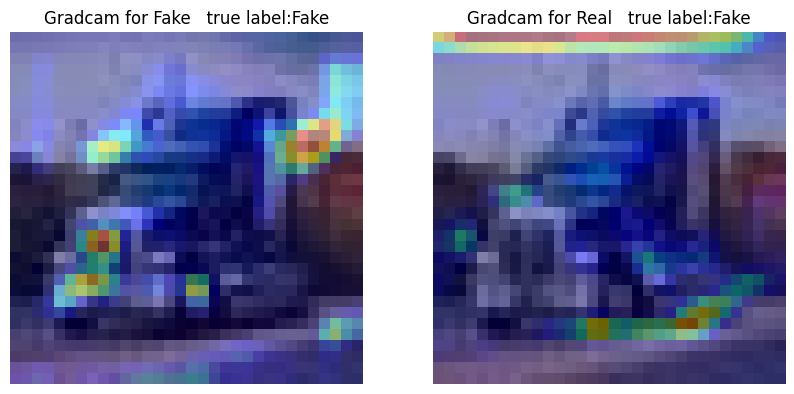

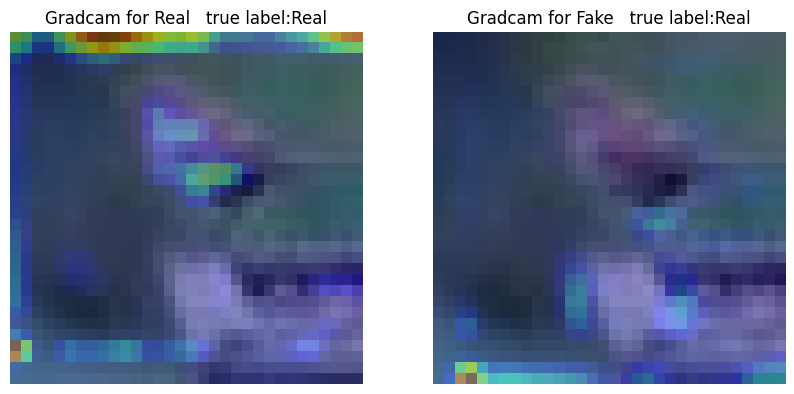

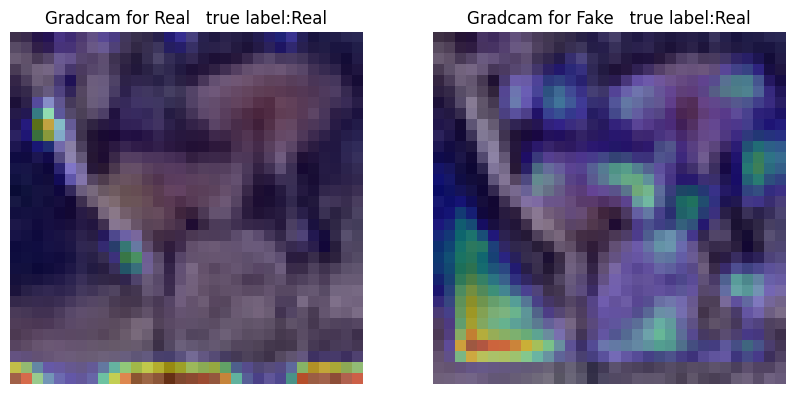

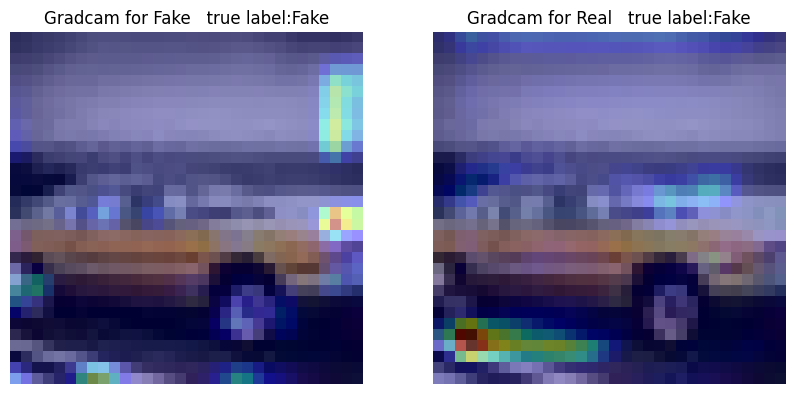

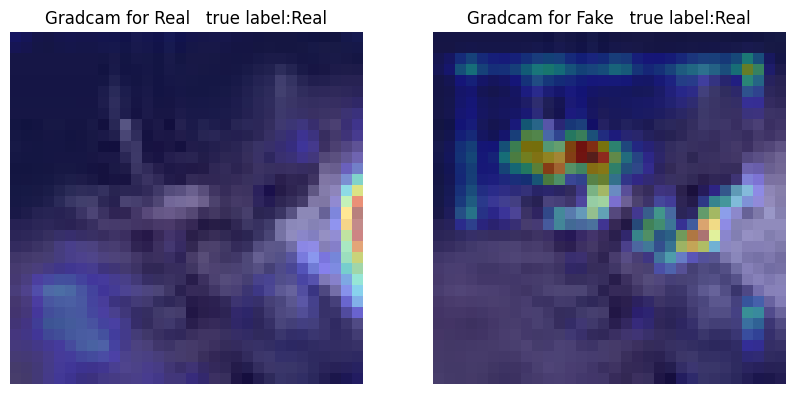

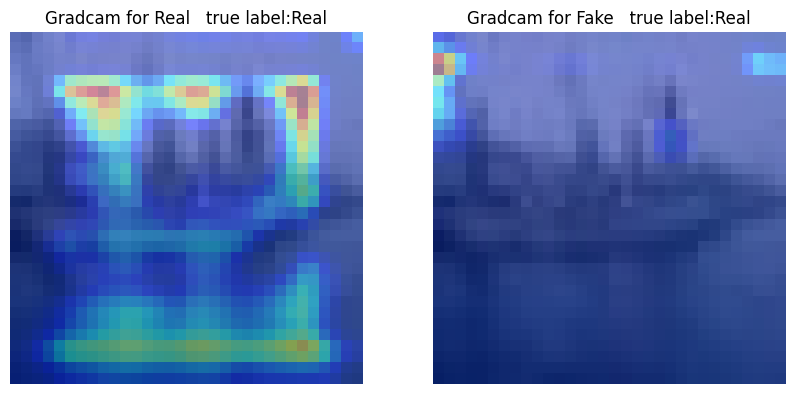

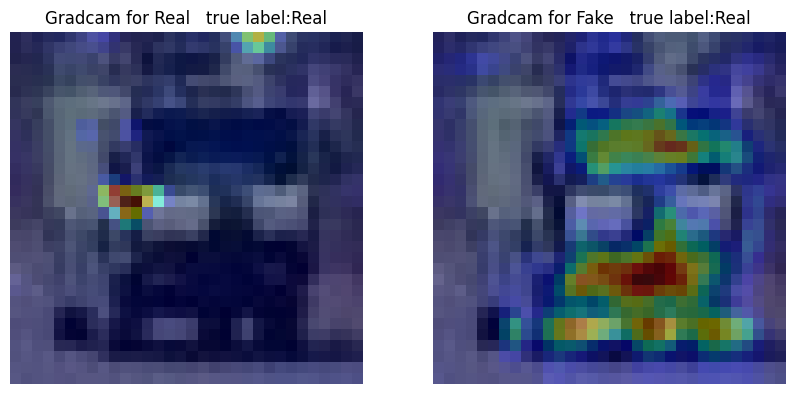

In [ ]:
# assign backward_hook and forward_hook to last convolutional layer
# Inspired by https://towardsdatascience.com/grad-cam-in-pytorch-use-of-forward-and-backward-hooks-7eba5e38d569 and made some
# adjustment according to our model and the way of presentation.
backward_hook = net.conv2.register_full_backward_hook(backward_hook)
forward_hook = net.conv2.register_forward_hook(forward_hook)
# get 10 examples
for k in range(10):
    img, targetr = next(iter(test_dataloader))
    img_p = img[0].to(device).unsqueeze(0)
    target = torch.tensor([targetr[0]]).to(device)
    label = labels_map[target.item()]
    # perform forward and backward using the test image
    output = net(img_p)
    loss = F.nll_loss(output, target)
    loss.backward()

    # pool the gradients across the channels
    pooled_gradients = torch.mean(gradients[0], dim=[0, 2, 3])
    # weight the channels by corresponding gradients
    for i in range(activations.size()[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    # average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()

    # relu on top of the heatmap
    heatmap = F.relu(heatmap)

    # normalize the heatmap
    heatmap /= torch.max(heatmap)
    heatmap = heatmap.detach().cpu().numpy()

    # Create a figure and plot the image for first class
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].axis('off')

    # First plot the original image
    axs[0].imshow(to_pil_image(img[0], mode='RGB'))

    # Resize the heatmap to the same size as the input image and defines
    # a resample algorithm for increasing image resolution
    overlay = to_pil_image(heatmap, mode='F').resize((32,32), resample=PIL.Image.BICUBIC)

    cmap = colormaps['jet']
    overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)
    axs[0].imshow(overlay, alpha=0.4, interpolation='nearest')
    title = "Fake" if target[0].item() == 1 else "Real"
    axs[0].set_title('Gradcam for '+title+f'   true label:{label}')
#     plt.savefig(f"new_photos/{k}_{title}_{label}.jpg")


    ''' For another class '''
    target = torch.tensor([abs(1-target[0])]).to(device)
    output = net(img_p)
    loss = F.nll_loss(output, target)
    loss.backward()

    # pool the gradients across the channels
    pooled_gradients = torch.mean(gradients[0], dim=[0, 2, 3])
    # weight the channels by corresponding gradients
    for i in range(activations.size()[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    # average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()

    # relu on top of the heatmap
    heatmap = F.relu(heatmap)

    # normalize the heatmap
    heatmap /= torch.max(heatmap)
    heatmap = heatmap.detach().cpu().numpy()

    # Create a figure and plot the image for second class
    axs[1].axis('off')

    # First plot the original image
    axs[1].imshow(to_pil_image(img[0], mode='RGB'))

    # Resize the heatmap to the same size as the input image and defines
    # a resample algorithm for increasing image resolution

    overlay = to_pil_image(heatmap, mode='F').resize((32,32), resample=PIL.Image.BICUBIC)
    cmap = colormaps['jet']
    overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)
    axs[1].imshow(overlay, alpha=0.4, interpolation='nearest')
    title = "Fake" if target[0].item() == 1 else "Real"
    axs[1].set_title('Gradcam for '+title+f'   true label:{label}')
#     plt.savefig(f"new_photos/{k}_{title}_{label}.jpg")
    plt.show()

## 5.4 Discussion on gradCAM results
We can observe that instead of focusing on the object only, the model pays attention to both background information and object details to make the judgment. Also, corner and border pixels are used for differentiating real and fake images. It is possible that the smoothness of these pixels implies the image is real or AI-generated. For this dataset, it is not easy for humans to differentiate real or fake images and therefore, the decision made by the neural network may not be understandable to humans even with gradCAM. The feedback from gradCAM can help us better understand the decision-making process of our shallow CNN model.

## 5.5 Using CNN and GradCAM in Face dataset(Real vs styleGAN)

In [ ]:
training_data = CIFAKEDataset(
    annotations_file = "face_label_train.csv",
    img_dir="Face/Face/Train/data_face",
    transform=transforms.ToTensor()
)

test_data = CIFAKEDataset(
    annotations_file = "face_label_test.csv",
    img_dir="Face/Face/Test/test_face",
    transform=transforms.ToTensor()
)
labels_map = {
    0: "Real",
    1: "Fake",
}

In [ ]:
class NetConv(nn.Module):
    # two convolutional layers and one fully connected layer,
    # all using relu, followed by log_softmax
    def __init__(self):
        super(NetConv, self).__init__()
        self.conv1 = nn.Conv2d(3,64,kernel_size=7,stride=1,padding=3,dilation=1)
        self.conv2 = nn.Conv2d(64,128,kernel_size=7,stride=1,padding=3,dilation=1)
        self.conv3 = nn.Conv2d(128,256,kernel_size=7,stride=1,padding=3,dilation=1)
        self.linear = nn.Linear(in_features=256*25*25, out_features=500)
        self.linear2 = nn.Linear(in_features=500, out_features=100)
        self.output = nn.Linear(in_features=100, out_features=2)
        self.gradients = None
    #increasing kernel size help improving accuracy, increasing size not much
    def forward(self, x):
        # x = x.reshape(-1, 784)
        # print(x.size())
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.reshape(-1, 256*25*25)
        x = self.linear(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.output(x)
        x = F.log_softmax(x, 1)
        return x

In [ ]:
device = torch.device('cuda')
net = NetConv().to(device)
device = torch.device('cuda')
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)
if list(net.parameters()):
    # use SGD optimizer
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

    net.eval()

    all = []
    matrixs = []
    # training and testing loop and print test accuracy
    for epoch in range(1, 20 + 1):
        train(net, device, train_dataloader, optimizer, epoch)
        test_acc, conf_matrix =test(net, device, test_dataloader)
        all.append(test_acc)
        matrixs.append(conf_matrix)
        torch.save(net, f'weights{epoch}.pt') # Save the weights
    print(all)
    print(max(all))

C:\Users\Lik\anaconda3\envs\yolov5\lib\site-packages\torchvision\transforms\functional.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:205.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Train Epoch: 1 [0/16999 (0%)]	Loss: 0.685694
Train Epoch: 1 [3200/16999 (19%)]	Loss: 0.693742
Train Epoch: 1 [6400/16999 (38%)]	Loss: 0.685945
Train Epoch: 1 [9600/16999 (56%)]	Loss: 0.692139
Train Epoch: 1 [12800/16999 (75%)]	Loss: 0.671943
Train Epoch: 1 [16000/16999 (94%)]	Loss: 0.677727
<class 'numpy.ndarray'>
[[ 999.    0.]
 [1000.    0.]]

Test set: Average loss: 0.6994, Accuracy: 999/1999 (50%)

Train Epoch: 2 [0/16999 (0%)]	Loss: 0.749537
Train Epoch: 2 [3200/16999 (19%)]	Loss: 0.699982
Train Epoch: 2 [6400/16999 (38%)]	Loss: 0.689326
Train Epoch: 2 [9600/16999 (56%)]	Loss: 0.679512
Train Epoch: 2 [12800/16999 (75%)]	Loss: 0.661373
Train Epoch: 2 [16000/16999 (94%)]	Loss: 0.686718
<class 'numpy.ndarray'>
[[838. 161.]
 [695. 305.]]

Test set: Average loss: 0.6793, Accuracy: 1143/1999 (57%)

Train Epoch: 3 [0/16999 (0%)]	Loss: 0.685112
Train Epoch: 3 [3200/16999 (19%)]	Loss: 0.674401
Train Epoch: 3 [6400/16999 (38%)]	Loss: 0.742682
Train Epoch: 3 [9600/16999 (56%)]	Loss: 0.635740

In [ ]:
#Select the best model for analysis (epoch 20)
disp = ConfusionMatrixDisplay(confusion_matrix=matrixs[19],display_labels=["Real", "Fake"])
disp.plot(values_format=".0f")

Average Precision : (743/(743+323) + 677/(677+256)) / 2 = 0.711​

Average Recall : (743/(743+256) + 677/(677+323)) / 2 = 0.711​

Accuracy : 1420/1999 (71%)​

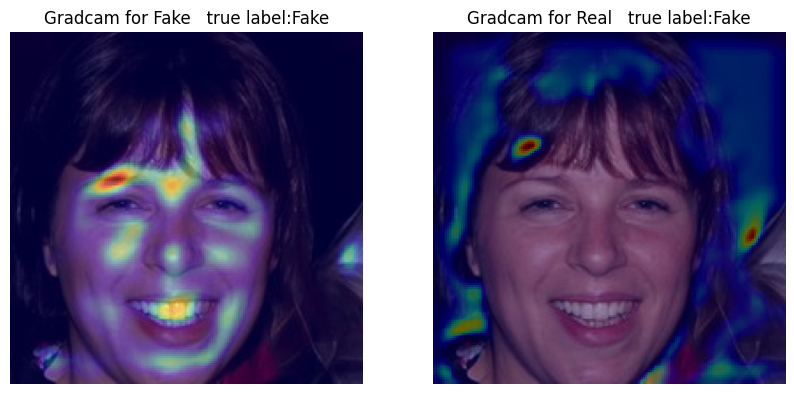

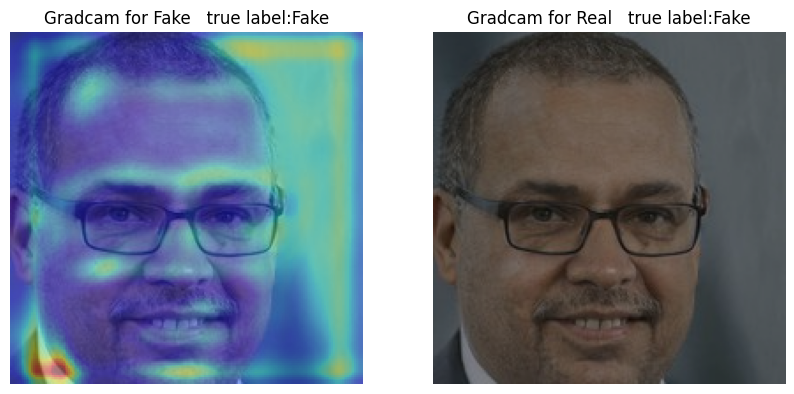

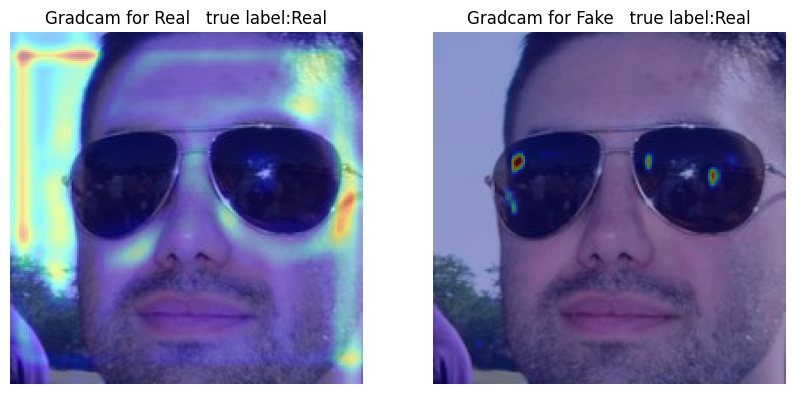

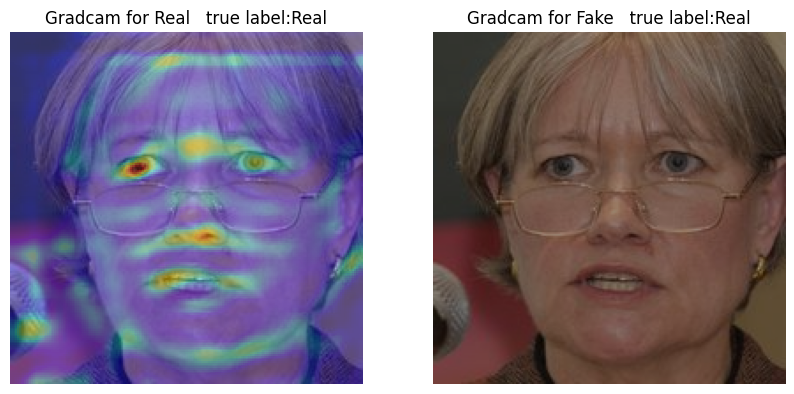

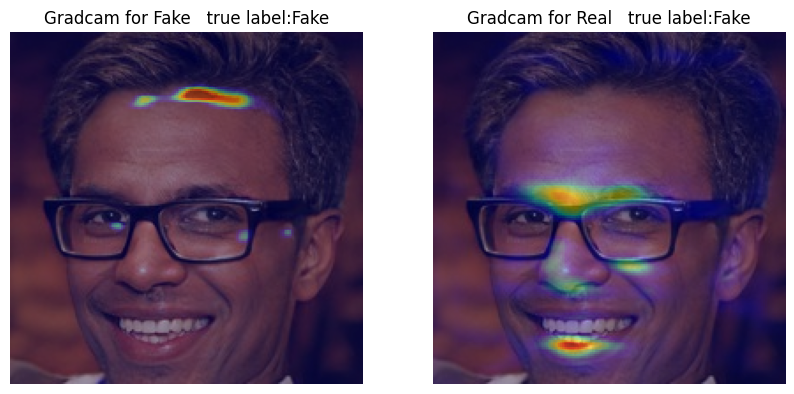

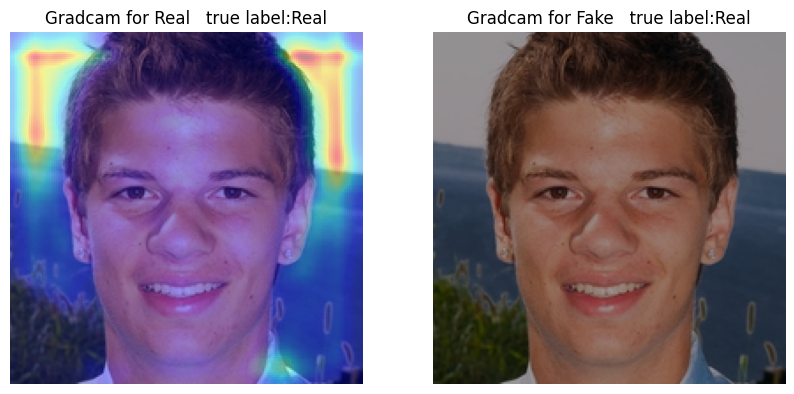

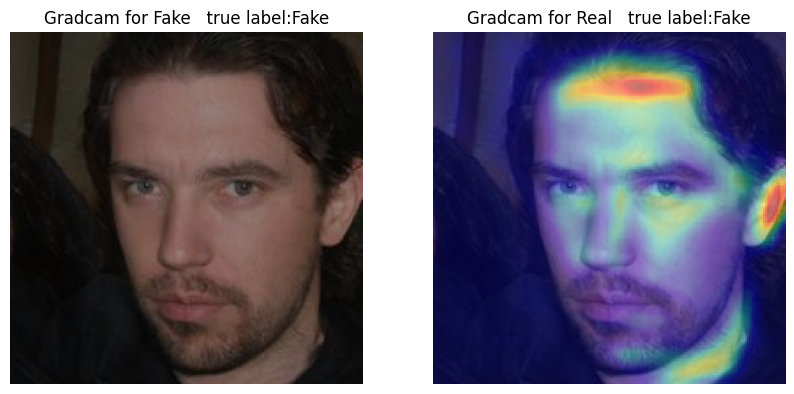

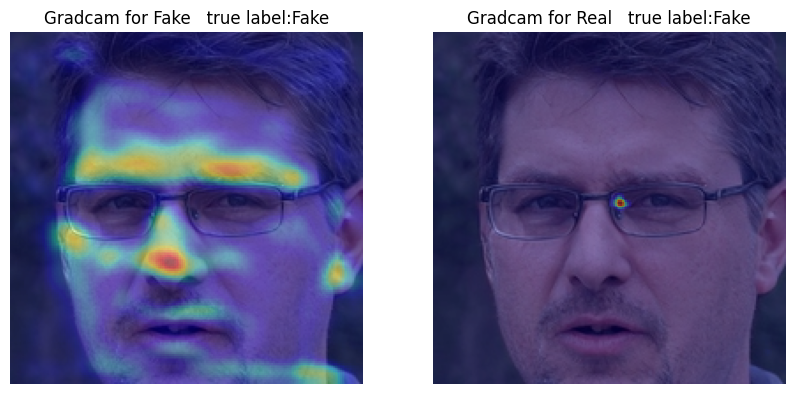

In [ ]:
net = torch.load('face_weights20.pt').to(device)
net.eval()
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
  global gradients
  gradients = grad_output

def forward_hook(module, args, output):
  global activations
  activations = output
# assign backward_hook and forward_hook to last convolutional layer
backward_hook = net.conv3.register_full_backward_hook(backward_hook)
forward_hook = net.conv3.register_forward_hook(forward_hook)
# get 10 examples
for k in range(10):
    img, targetr = next(iter(test_dataloader))
    img_p = img[0].to(device).unsqueeze(0)
    target = torch.tensor([targetr[0]]).to(device)
    label = labels_map[target.item()]
    # perform forward and backward using the test image
    output = net(img_p)
    loss = F.nll_loss(output, target)
    loss.backward()

    # pool the gradients across the channels
    pooled_gradients = torch.mean(gradients[0], dim=[0, 2, 3])
    # weight the channels by corresponding gradients
    for i in range(activations.size()[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    # average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()

    # relu on top of the heatmap
    heatmap = F.relu(heatmap)

    # normalize the heatmap
    heatmap /= torch.max(heatmap)
    heatmap = heatmap.detach().cpu().numpy()

    # Create a figure and plot the image for first class
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].axis('off')

    # First plot the original image
    axs[0].imshow(to_pil_image(img[0], mode='RGB'))

    # Resize the heatmap to the same size as the input image and defines
    # a resample algorithm for increasing image resolution
    overlay = to_pil_image(heatmap, mode='F').resize((200,200), resample=PIL.Image.BICUBIC)

    cmap = colormaps['jet']
    overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)
    axs[0].imshow(overlay, alpha=0.4, interpolation='nearest')
    title = "Fake" if target[0].item() == 1 else "Real"
    axs[0].set_title('Gradcam for '+title+f'   true label:{label}')
#     plt.savefig(f"new_photos/{k}_{title}_{label}.jpg")


    ''' For another class '''
    target = torch.tensor([abs(1-target[0])]).to(device)
    output = net(img_p)
    loss = F.nll_loss(output, target)
    loss.backward()

    # pool the gradients across the channels
    pooled_gradients = torch.mean(gradients[0], dim=[0, 2, 3])
    # weight the channels by corresponding gradients
    for i in range(activations.size()[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    # average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()

    # relu on top of the heatmap
    heatmap = F.relu(heatmap)

    # normalize the heatmap
    heatmap /= torch.max(heatmap)
    heatmap = heatmap.detach().cpu().numpy()

    # Create a figure and plot the image for second class
    axs[1].axis('off')

    # First plot the original image
    axs[1].imshow(to_pil_image(img[0], mode='RGB'))

    # Resize the heatmap to the same size as the input image and defines
    # a resample algorithm for increasing image resolution

    overlay = to_pil_image(heatmap, mode='F').resize((200,200), resample=PIL.Image.BICUBIC)
    cmap = colormaps['jet']
    overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)
    axs[1].imshow(overlay, alpha=0.4, interpolation='nearest')
    title = "Fake" if target[0].item() == 1 else "Real"
    axs[1].set_title('Gradcam for '+title+f'   true label:{label}')
#     plt.savefig(f"new_photos/{k}_{title}_{label}.jpg")
    plt.show()

## 5.6 Discussion on GradCAM results for faces
We can also observe from the result that our model will make use of background and face details information in its decision-making process. We also observe for some images, there is no features corresponding to one of the class. Our interpretation is that because GradCAM filter all negative influences, that means all feature supports another class. Another consideration is that our model is not doing very well in overall accuracy, the features extracted from this model may not represent the true difference between the two classes.

## 5.7 Discussion on Shallow CNN
The use of shallow CNN can work well in our small dataset (CIFAKE) where the dimension of images is only 32x32. The features are limited and shallow CNN is able to extract them and make a pretty good prediction. However, there may be overfitting to this dataset in terms of identifying features corresponding to real or fake images that our model can not be used in other data to differentiate between real and fake images.

Apart from the small dataset, we can see the limitation of using shallow CNN in more complicated data such as our face dataset. The accuracy is not promising and therefore the features it focuses on may not represent the true features differentiating real and fake images.

We also observe the limitation of explainable AI in differentiating real and fake images because even though we know what features correspond to which class, it is difficult for us to explain why these features lead to a real or fake photo. We can only interpret some general information like the smoothness of the skin. For future works, more explainable AI can be studied and applied to this task to see if they can help us understand the difference between real and fake images.

# 6. Pre-trained models


## 6.1 ViT for Multi-Generators

### Face dataset extracted from Artifact:
Synthetic images generated by 5 generators and 1 class of Real image.

### ViT  pre-train model with fine-tuning:
1. Base model: 'google/vit-base-patch16-224-in21k'.

2. Unfreeze top 2 layers of pre-train ViT model.

3. Add two more layers for the classifier.

4. Loss_func = nn.CrossEntropyLoss(), Optimizer = optim.Adam

In [ ]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from transformers import ViTForImageClassification, ViTConfig

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    f1_score
)

import matplotlib.pyplot as plt
import os

from PIL import Image
import time

In [ ]:
# Load dataset and apply transforms to it
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = datasets.ImageFolder(root='./Face/Train', transform=transform)
test_dataset = datasets.ImageFolder(root='./Face/Test', transform=transform)

# Get the class to index mapping
class_to_idx = train_dataset.class_to_idx

# Split train_dataset for training and validation
train_total = len(train_dataset)
train_samples = int(train_total * 0.9)
val_samples = train_total - train_samples
train_dataset, val_dataset = random_split(train_dataset, [train_samples, val_samples])

# Batch size
bs = 128

train_data_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(val_dataset, batch_size=bs, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=bs, shuffle=True)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("mps")

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(train_dataset)
valid_data_size = len(val_dataset)
test_data_size = len(test_dataset)

print(train_data_size, valid_data_size, test_data_size)
print(class_to_idx)

39600 4400 6000
{'Denoising_diffusion_gan': 0, 'Gansformer': 1, 'Palette': 2, 'Real': 3, 'Sfhq': 4, 'Stylegan1': 5}


In [ ]:
# Define pre-trained ViT model string
model_str = 'google/vit-base-patch16-224-in21k'

# Load pre-trained ViT model
ViT_model = ViTForImageClassification.from_pretrained(model_str)

# Freeze the pre-trained parameters
for param in ViT_model.parameters():
    param.requires_grad = False

N = 2  # Unfreeze the top N layer parameter
for layer in ViT_model.vit.encoder.layer[-N:]:
    for param in layer.parameters():
        param.requires_grad = True

# Get the number of input features to the classifier
in_features = ViT_model.classifier.in_features

dropout_rate = 0.3

# Create a new classifier - a linear layer followed by a ReLU and another linear layer
new_classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features, 512),  # First linear layer
    torch.nn.BatchNorm1d(512),          # Batch Normalization
    torch.nn.ReLU(),                    # ReLU activation
    torch.nn.Dropout(dropout_rate),     # Dropout
    torch.nn.Linear(512, 6)             # Final linear layer with 6 outputs
)

# Replace the pre-trained model's classifier with the new classifier
ViT_model.classifier = new_classifier

# Unfreeze the new layers
for param in ViT_model.classifier.parameters():
    param.requires_grad = True

ViT_model = ViT_model.to(device)

# Define the L2 regularization strength
weight_decay = 1e-5

# Define Optimizer and Loss Function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, ViT_model.parameters()), weight_decay=weight_decay)
loss_func = nn.CrossEntropyLoss()


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_loss = float('inf')
    best_epoch = None

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        # Set to training mode
        model.train()

        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_data_loader):
            print(f'Training batch {i+1}/{len(train_data_loader)}')
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs.logits, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.logits.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                print(f'Validating batch {j+1}/{len(valid_data_loader)}')
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs.logits, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.logits.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))

    # Save model
    torch.save(model, 'model_'+str(epoch)+'.pt')

    return model, history, best_epoch

In [ ]:
# Train and evaluate model
num_epochs = 5
trained_model, history, best_epoch = train_and_validate(ViT_model, loss_func, optimizer, num_epochs)

Epoch: 1/5
Training batch 1/310
Training batch 2/310
Training batch 3/310
Training batch 4/310
Training batch 5/310
Training batch 6/310
Training batch 7/310
Training batch 8/310
Training batch 9/310
Training batch 10/310
Training batch 11/310
Training batch 12/310
Training batch 13/310
Training batch 14/310
Training batch 15/310
Training batch 16/310
Training batch 17/310
Training batch 18/310
Training batch 19/310
Training batch 20/310
Training batch 21/310
Training batch 22/310
Training batch 23/310
Training batch 24/310
Training batch 25/310
Training batch 26/310
Training batch 27/310
Training batch 28/310
Training batch 29/310
Training batch 30/310
Training batch 31/310
Training batch 32/310
Training batch 33/310
Training batch 34/310
Training batch 35/310
Training batch 36/310
Training batch 37/310
Training batch 38/310
Training batch 39/310
Training batch 40/310
Training batch 41/310
Training batch 42/310
Training batch 43/310
Training batch 44/310
Training batch 45/310
Training

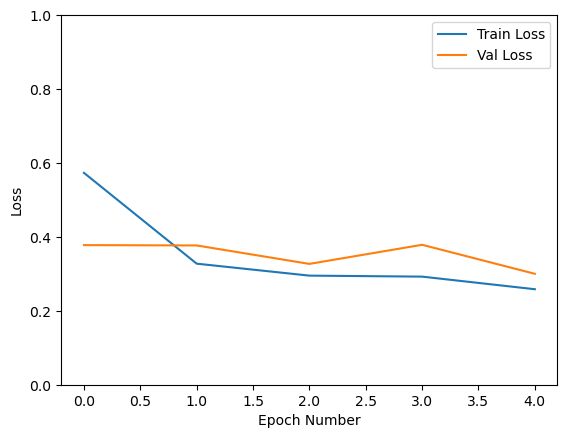

In [ ]:
import numpy as np
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig('loss_curve.png')
plt.show()

In [ ]:
plt.plot(history[:,2:4])
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('accuracy_curve.png')
plt.show()

In [ ]:
import seaborn as sns

def computeTestSetMetrics(model, loss_criterion, test_data_loader, test_data_size, class_to_idx):
    '''
    Function to compute the accuracy on the test set
    Parameters
        :param model: Model to test
        :param loss_criterion: Loss Criterion to minimize
        :param test_data_loader: DataLoader for the test set
        :param test_data_size: Size of the test set
        :param class_to_idx: Dictionary mapping class names to indices
    '''

    model = model.to(device)

    test_acc = 0.0
    test_loss = 0.0

    all_labels = []
    all_predictions = []

    # Create a list of class names from the idx_to_class mapping
    idx_to_class = {v: k for k, v in class_to_idx.items()}
    class_names = [idx_to_class[i] for i in range(len(class_to_idx))]

    # No gradient tracking needed
    with torch.no_grad():

        model.eval()

        # Validation loop
        for j, (inputs, labels) in enumerate(test_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs.logits, labels)

            # Compute the total loss for the batch and add it to valid_loss
            test_loss += loss.item() * inputs.size(0)

            # Get predictions
            ret, predictions = torch.max(outputs.logits.data, 1)

            # Append batch predictions and labels to the lists
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

            # Compute accuracy
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            # Compute total accuracy in the whole batch and add to valid_acc
            test_acc += acc.item() * inputs.size(0)

            print("Test Batch number: {:03d}, Test: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

        # Find average test loss and test accuracy
        avg_test_loss = test_loss/test_data_size
        avg_test_acc = test_acc/test_data_size
        print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(avg_test_loss, avg_test_acc))

        # Compute confusion matrix and classification report
        cm = confusion_matrix(all_labels, all_predictions, labels=[class_to_idx[class_name] for class_name in class_names])
        cr = classification_report(all_labels, all_predictions, target_names=class_names)

        print("Confusion Matrix:")
        print(cm)
        print("Classification Report:")
        print(cr)

        figure = plt.figure(figsize=(8, 8))
        sns.heatmap(cm, annot=False, fmt="d", cmap='viridis', xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

        # Annotate each cell
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j+0.5, i+0.5, format(cm[i, j], 'd'),
                         horizontalalignment="center",
                         color="black" if cm[i, j] > thresh else "white", size=16)

        plt.show()

In [ ]:
computeTestSetMetrics(ViT_model, loss_func, test_data_loader, test_data_size, class_to_idx)

Test Batch number: 000, Test: Loss: 0.8653, Accuracy: 0.7188
Test Batch number: 001, Test: Loss: 0.4363, Accuracy: 0.8438
Test Batch number: 002, Test: Loss: 0.3418, Accuracy: 0.8672
Test Batch number: 003, Test: Loss: 0.3771, Accuracy: 0.8984
Test Batch number: 004, Test: Loss: 0.2762, Accuracy: 0.8750
Test Batch number: 005, Test: Loss: 0.4151, Accuracy: 0.8516
Test Batch number: 006, Test: Loss: 0.3687, Accuracy: 0.8438
Test Batch number: 007, Test: Loss: 0.4840, Accuracy: 0.8047
Test Batch number: 008, Test: Loss: 0.2957, Accuracy: 0.8750
Test Batch number: 009, Test: Loss: 0.3585, Accuracy: 0.8984
Test Batch number: 010, Test: Loss: 0.2708, Accuracy: 0.9141
Test Batch number: 011, Test: Loss: 0.4058, Accuracy: 0.8828
Test Batch number: 012, Test: Loss: 0.3074, Accuracy: 0.8984
Test Batch number: 013, Test: Loss: 0.2785, Accuracy: 0.8906
Test Batch number: 014, Test: Loss: 0.2339, Accuracy: 0.9141
Test Batch number: 015, Test: Loss: 0.3114, Accuracy: 0.8984
Test Batch number: 016, 

#### Confusion Matrix Analysis:

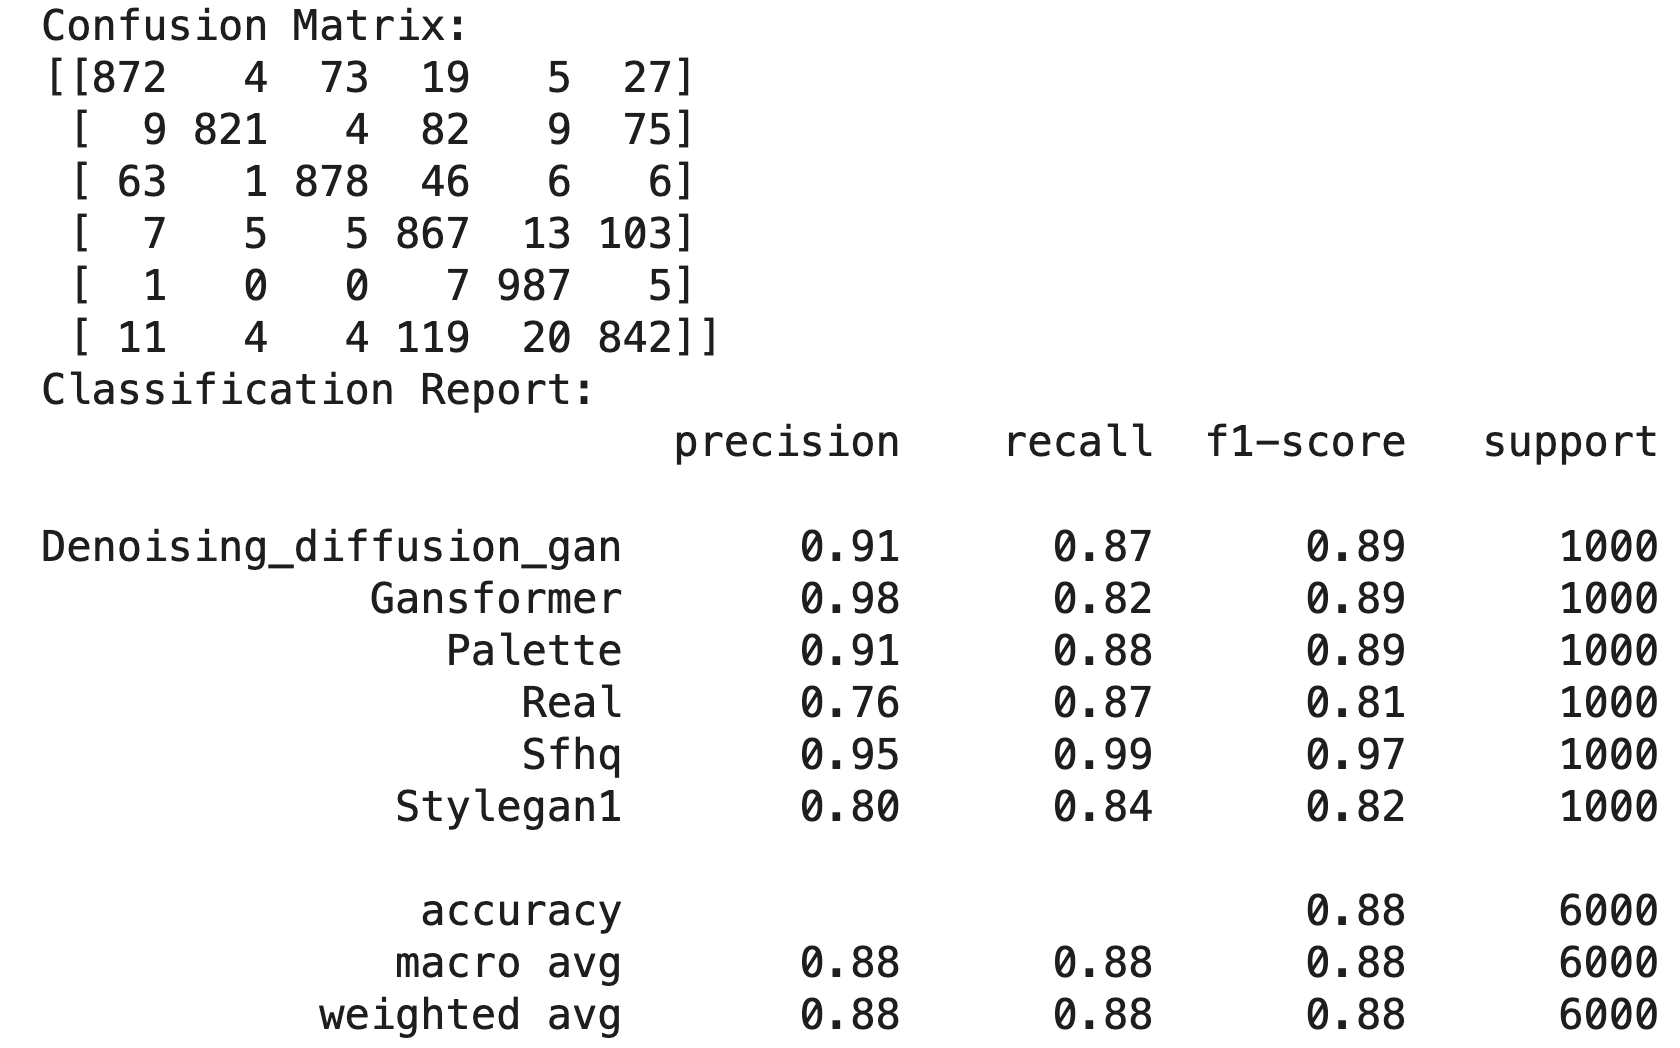

- Overall accuracy: 0.88
- Real vs Stylegan
  - Very difficult to distinguish by human eyes.
  - Style-based architecture allows for manipulation of styles at different scales. And these styles can be changed independently.
  - Trained on real images and can generate high-resolution images
- Denoising_diffusion_gan vs Palette
  - Denoising_diffusion_gan: reformulate denoising diffusion models for rapid sampling while maintaining quality and diversity by employing a multimodal conditional GAN
  - Palette: Image-to-Image Diffusion Models, focusing on  image-to-image colorization, inpainting, uncropping, and JPEG restoration

## 6.2 ViT Testing Unseen Generator


Training Face dataset extracted from Artifact: Real and Fake (mixture of 5 different generators). Train on this diverse fake data can combine all features and methods that different generators generated or used. This will be useful to detect new unseen generator while AGI is booming and new generator may come out by month even by day.

Use Unseen generator - Cips to be tested:
 - Very difficult to distinguish by human eyes.
 - A style-based, 3D-aware generator of GANs.

Result:
 - Testing Precison and Recall are above 0.85. Overall accuracy is 0.88.
 - Prediction accuracy on Cips is 95%.
 - Can also be extended to be used for testing deepfake video frames

In [ ]:
!pip install transformers

In [ ]:
# Load binary Real and Fake dataset and apply transforms to it
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    # can add more data augmentation here
])

train_dataset = datasets.ImageFolder(root='./Face_Real_Fake/Train', transform=transform)
test_dataset = datasets.ImageFolder(root='./Face_Real_Fake/Test', transform=transform)

# Get the class to index mapping
class_to_idx = train_dataset.class_to_idx

# Split train_dataset for training and validation
train_total = len(train_dataset)
train_samples = int(train_total * 0.9)
val_samples = train_total - train_samples
train_dataset, val_dataset = random_split(train_dataset, [train_samples, val_samples])

# Batch size
bs = 128

train_data_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(val_dataset, batch_size=bs, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=bs, shuffle=True)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("mps")

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(train_dataset)
valid_data_size = len(val_dataset)
test_data_size = len(test_dataset)

print(train_data_size, valid_data_size, test_data_size)
print(class_to_idx)

16200 1800 2000
{'Fake': 0, 'Real': 1}


In [ ]:
# Define the pre-trained ViT model string
model_str = 'google/vit-base-patch16-224-in21k'

# Load the pre-trained ViT model
ViT_model = ViTForImageClassification.from_pretrained(model_str)

# Freeze the pre-trained parameters
for param in ViT_model.parameters():
    param.requires_grad = False

N = 2  # Unfreeze the top N layer parameter
for layer in ViT_model.vit.encoder.layer[-N:]:
    for param in layer.parameters():
        param.requires_grad = True

# Get the number of input features to the classifier
in_features = ViT_model.classifier.in_features

dropout_rate = 0.3

# Create a new classifier - a linear layer followed by a ReLU and another linear layer
new_classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features, 512),  # First linear layer
    torch.nn.BatchNorm1d(512),          # Batch Normalization
    torch.nn.ReLU(),                    # ReLU activation
    torch.nn.Dropout(dropout_rate),     # Dropout
    torch.nn.Linear(512, 2)             # Final linear layer with 2 outputs
)

# Replace the pre-trained model's classifier with the new classifier
ViT_model.classifier = new_classifier

# Unfreeze the new layers
for param in ViT_model.classifier.parameters():
    param.requires_grad = True

ViT_model = ViT_model.to(device)

# Define the L2 regularization strength
weight_decay = 1e-5

# Define Optimizer and Loss Function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, ViT_model.parameters()), weight_decay=weight_decay)
loss_func = nn.CrossEntropyLoss()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train and evaluate model
num_epochs = 5
trained_model, history, best_epoch = train_and_validate(ViT_model, loss_func, optimizer, num_epochs)

Epoch: 1/5
Training batch 1/127
Training batch 2/127
Training batch 3/127
Training batch 4/127
Training batch 5/127
Training batch 6/127
Training batch 7/127
Training batch 8/127
Training batch 9/127
Training batch 10/127
Training batch 11/127
Training batch 12/127
Training batch 13/127
Training batch 14/127
Training batch 15/127
Training batch 16/127
Training batch 17/127
Training batch 18/127
Training batch 19/127
Training batch 20/127
Training batch 21/127
Training batch 22/127
Training batch 23/127
Training batch 24/127
Training batch 25/127
Training batch 26/127
Training batch 27/127
Training batch 28/127
Training batch 29/127
Training batch 30/127
Training batch 31/127
Training batch 32/127
Training batch 33/127
Training batch 34/127
Training batch 35/127
Training batch 36/127
Training batch 37/127
Training batch 38/127
Training batch 39/127
Training batch 40/127
Training batch 41/127
Training batch 42/127
Training batch 43/127
Training batch 44/127
Training batch 45/127
Training

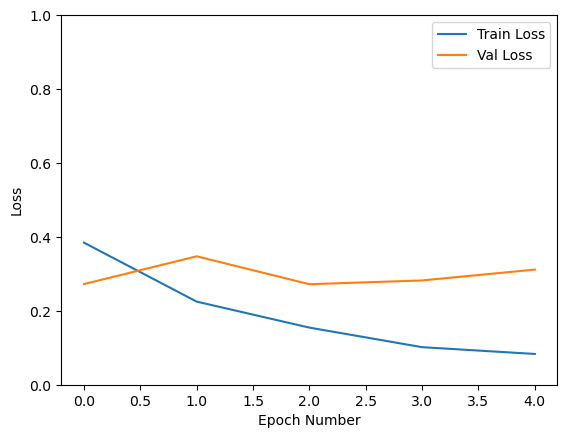

In [ ]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig('loss_curve.png')
plt.show()

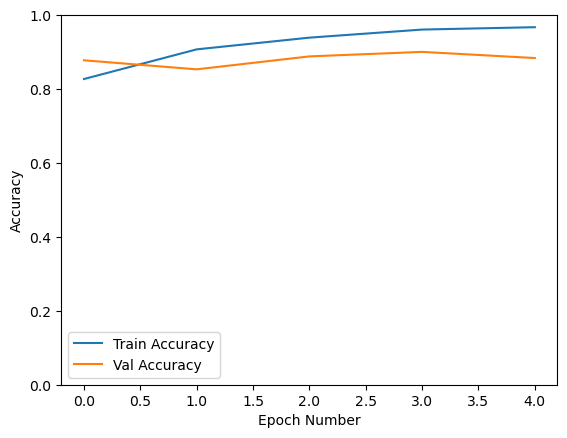

In [ ]:
plt.plot(history[:,2:4])
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('accuracy_curve.png')
plt.show()

In [ ]:
computeTestSetMetrics(ViT_model, loss_func, test_data_loader, test_data_size, class_to_idx)

Test Batch number: 000, Test: Loss: 0.3211, Accuracy: 0.8984
Test Batch number: 001, Test: Loss: 0.4101, Accuracy: 0.8594
Test Batch number: 002, Test: Loss: 0.2452, Accuracy: 0.8984
Test Batch number: 003, Test: Loss: 0.4722, Accuracy: 0.8594
Test Batch number: 004, Test: Loss: 0.3140, Accuracy: 0.8594
Test Batch number: 005, Test: Loss: 0.4087, Accuracy: 0.8438
Test Batch number: 006, Test: Loss: 0.2924, Accuracy: 0.9062
Test Batch number: 007, Test: Loss: 0.2389, Accuracy: 0.8906
Test Batch number: 008, Test: Loss: 0.1758, Accuracy: 0.9219
Test Batch number: 009, Test: Loss: 0.4220, Accuracy: 0.8438
Test Batch number: 010, Test: Loss: 0.2719, Accuracy: 0.9219
Test Batch number: 011, Test: Loss: 0.3779, Accuracy: 0.8906
Test Batch number: 012, Test: Loss: 0.3802, Accuracy: 0.8359
Test Batch number: 013, Test: Loss: 0.2696, Accuracy: 0.8906
Test Batch number: 014, Test: Loss: 0.3256, Accuracy: 0.8906
Test Batch number: 015, Test: Loss: 0.1183, Accuracy: 0.9500
Test Loss: 0.3200, Test 

In [ ]:
# Test unseen generator fake images, here is Cips generator
def predict(model, new_images_path):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    device = torch.device("mps")

    # Define the transformation applied to the images
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    # Load the new images
    new_images_dataset = datasets.ImageFolder(root=new_images_path, transform=transform)
    new_images_loader = DataLoader(new_images_dataset, batch_size=bs, shuffle=False)

    # Load the model and set it to evaluation mode
    model = model.to(device)
    model.eval()

    # Initialize counter
    total_images = 0
    total_real = 0

    # Disable gradient computation
    with torch.no_grad():
        for images, _ in new_images_loader:
            images = images.to(device)
            outputs = model(images)
            probabilities = torch.sigmoid(outputs.logits).squeeze()
            print(probabilities)
            predictions = torch.argmax(probabilities, dim=1)
            print(predictions)
            total_images += images.size(0)
            total_real += predictions.sum().item()

    print(total_real)
    print(total_images)

    # Calculate the percentage of real images
    real_percentage = (total_real / total_images) * 100
    fake_percentage = 100 - real_percentage

    return real_percentage, fake_percentage


new_images_path = './cips'

real_percentage, fake_percentage = predict(trained_model, new_images_path)

print(f"Percentage of Real Images: {real_percentage:.2f}%")
print(f"Percentage of Fake Images: {fake_percentage:.2f}%")

tensor([[9.7454e-01, 9.0638e-03],
        [4.1757e-01, 5.5700e-01],
        [9.8826e-01, 3.9981e-03],
        [8.6600e-01, 8.8912e-02],
        [2.3885e-01, 6.9412e-01],
        [9.2211e-01, 3.7850e-02],
        [9.3790e-01, 2.8059e-02],
        [9.7724e-01, 8.6902e-03],
        [8.1737e-01, 1.2393e-01],
        [9.3010e-01, 3.1059e-02],
        [9.0176e-01, 5.2906e-02],
        [8.6821e-01, 7.4214e-02],
        [9.8214e-01, 5.8485e-03],
        [9.9383e-01, 1.7173e-03],
        [9.4033e-01, 3.2209e-02],
        [6.0933e-01, 3.0905e-01],
        [9.7222e-01, 9.0144e-03],
        [9.8651e-01, 4.9401e-03],
        [9.8979e-01, 3.7826e-03],
        [9.7741e-01, 8.9265e-03],
        [9.7613e-01, 8.2308e-03],
        [7.6942e-01, 1.7528e-01],
        [9.9801e-01, 3.7477e-04],
        [9.7406e-01, 9.5702e-03],
        [9.9652e-01, 7.0286e-04],
        [8.4433e-01, 1.0465e-01],
        [9.8721e-01, 3.7876e-03],
        [8.9063e-01, 6.2602e-02],
        [9.9299e-01, 1.6580e-03],
        [9.713

## 6.3 Training Other Pre-trained Models for Multi-Generators

_(Note: from this section on, we train models from tensorflow API on one member's Mac M2 machine)_

Section 6.1 and 6.2 have shown that ViT model performs much better than the traditional neural network and shallow CNN architecture with an overall accuracy score of 88%, and this result is validated on the test of unseen generator.

To further enhance the overall accuracy of the classification model, we also train other 4 pre-trained models, including, ResNet50, Inception-V3, EffecientNetB4, VGG19 by taking advantage of the API of  `tf.keras.applications`.To ensure the consistency of the experiments, we include the other version of ViT model from `vit_keras` library. In section 6.4, we focus on the models with overall accuravy above 80% on validation dataset, and experiment on the feature extraction and classification using the extracted features.

__ResNet50 model__: composed of 50 layers, incorporates residual learning, addressing the vanishing gradient problem and enabling the training of exceptionally deep networks. With approximately 25.6 million parameters, ResNet50 is notable for its depth and expressive capacity.

__Inception-V3__: a variant of the Inception series, utilizes parallel convolutional filters of varying sizes within its architecture. Boasting around 23.8 million parameters, it strikes a balance between computational efficiency and accuracy.

__EfficientNetB4__: belonging to the EfficientNet family, is recognized for its efficiency in terms of both computational resources and model size, with approximately 19 million parameters.

__VGG19__: a member of the Visual Geometry Group family, is characterized by its simplicity with small convolutional filters and 19 layers. While VGG19 captures intricate hierarchical features, its parameter count is relatively high at approximately 143.7 million.

__Transformer (ViT) B16__: introduces a novel approach by employing self-attention mechanisms on fixed-size patches in the input image. With approximately 86 million parameters, ViTB16 captures global dependencies in images through transformer architectures.

These models present diverse trade-offs between model size, computational efficiency, and accuracy, providing a spectrum of choices for various computer vision applications.






In [ ]:
# loading packages
import numpy as np
from matplotlib import pyplot as plt
import keras, tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
import seaborn as sns

In [ ]:
# Data loading
train_directory = 'Face/train'
test_directory = 'Face/test'

BATCH_SIZE = 128
IM_SIZE = 200

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = train_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    image_size= (IM_SIZE,IM_SIZE),
    shuffle=True,
    seed=99,
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = test_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    image_size= (IM_SIZE, IM_SIZE),
    shuffle=False,
)

Found 44000 files belonging to 6 classes.
Metal device set to: Apple M2 Pro


2023-11-15 13:15:39.254912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-15 13:15:39.255190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 6000 files belonging to 6 classes.


In [ ]:
# example images
class_names = train_dataset.class_names
print("Class names:", class_names)
class_num = len(class_names)

img_shape=(IM_SIZE,IM_SIZE,3)

for images, labels in train_dataset.take(1):
    # Display the first 9 images in the batch
    plt.figure(figsize=(8, 8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

    plt.show()

Class names: ['Denoising_diffusion_gan', 'Gansformer', 'Palette', 'Real', 'Sfhq', 'Stylegan1']


2023-11-15 13:15:39.630072: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [ ]:
# Data Summary of training dataset
# Count image number in each class of training dataset
class_counts = {}

# Iterate over the training dataset
for images, labels in train_dataset:
    for label in labels.numpy():
        class_name = class_names[tf.argmax(label)]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Sfhq: 9000 images
Denoising_diffusion_gan: 9000 images
Palette: 5000 images
Gansformer: 4000 images
Real: 9000 images
Stylegan1: 8000 images


In [ ]:
# Split the train dataset to train and validation dataset

# Define the size of the dataset
dataset_size = tf.data.experimental.cardinality(train_dataset).numpy()
# Calculate the size of the validation set (10% of the dataset)
validation_size = int(0.1 * dataset_size)
# Split the dataset into training and validation sets
train_data = train_dataset.skip(validation_size)
validation_data = train_dataset.take(validation_size)

### 6.3.1  General settings for model training

In this section, we define the general settings for model training. For all 5 pre-trained models mentioned above, we use the models' pre-trained weights on ImageNet, freezing all layers except the Batch Normalization layers (or "LayerNormalization" of the ViT-b16). The classification head is comprised of a Global Average Pooling layer which
condenses the feature map, followed by two fully connected layers with 512 neurons (same setting in section 6.1), and concludes with a softmax layer for 6-class classification as required.

Due to the various requirement of input format, all the image have been pre-processed accordingly (batch size = 128). We use 10% of training dataset as validation data and train the following models, using Adam optimizer with learning rate of 0.001, and categorical cross-entropy as loss function.

In [ ]:
# image preprocessing function (for pre-trained model)
def input_precessor(preprocess_function, data):
    return data.map(lambda x, y: (preprocess_function(x), y))


In [ ]:
#  model building:
def create_model(base_model, class_num = 6, batchnormalization_layers_trainable = True):
    for layer in base_model.layers:
        layer.trainable = False

    # free the BatchNormalization layer
    for layer in base_model.layers:
        if "BatchNormalization" in layer.__class__.__name__: # for other models
            layer.trainable = batchnormalization_layers_trainable
        if "LayerNormalization" in layer.__class__.__name__: # for vit model
            layer.trainable = batchnormalization_layers_trainable


    x = base_model.output
    #x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
    x = Dense(512, activation='relu')(x)
    output = Dense(class_num, activation='softmax')(x)

    return Model(inputs=base_model.input, outputs=output)




In [ ]:
# Learning curve plot
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Extract the metrics from the history object
    epochs = range(1, len(acc) + 1)

    # Create a single row with three plots side by side
    plt.figure(figsize=(10, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')


    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()

# model evaluation

def model_evaluation(model, test_, true_classes, class_names = train_dataset.class_names):
    predictions = model.predict(test_)
    predicted_classes = tf.argmax(predictions, axis=1)
    class_report = classification_report(true_classes, predicted_classes, target_names = class_names)

    print("Classification Report:")
    print(class_report)

    cm = confusion_matrix(true_classes, predicted_classes)
    print("Confusion Matrix:")
    print(cm)

    cm_display(cm)

# show confusion matrix
def cm_display(cm):
    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=False, fmt="d", cmap='viridis', xticklabels=class_names, yticklabels = class_names)
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # Annotate each cell with the numeric value using plt.text()
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.5, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white", size=10)

    plt.show()

### 6.3.2 Training RseNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
preprocess_function = tf.keras.applications.resnet50.preprocess_input
# initialize the base model
base_model = ResNet50(include_top = False,weights='imagenet', input_shape=img_shape, pooling='max')

# building fine-tuned model

for layer in base_model.layers:
    layer.trainable = False

    # free the BatchNormalization layer
for layer in base_model.layers:
    if "BatchNormalization" in layer.__class__.__name__:
        layer.trainable = True

x=base_model.output
#x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(512, activation='relu')(x)
output = Dense(class_num, activation='softmax')(x)

rn50_model= Model(inputs=base_model.input, outputs=output)

In [ ]:
#rn50_model.summary()

In [ ]:
rn50_model.compile(optimizer = Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_ = input_precessor(preprocess_function, train_data)
val_ = input_precessor(preprocess_function, validation_data)

In [ ]:
initial_epoch = 5
history_rn50= rn50_model.fit(train_, epochs = initial_epoch,  validation_data = val_, shuffle = True)

Epoch 1/5


2023-11-12 18:28:51.222422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - ETA: 0s - loss: 2.7550 - accuracy: 0.5924

2023-11-12 18:34:22.280942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 352s 1s/step - loss: 2.7550 - accuracy: 0.5924 - val_loss: 0.6592 - val_accuracy: 0.7429
Epoch 2/5
310/310 [==============================] - 315s 1s/step - loss: 0.5226 - accuracy: 0.8001 - val_loss: 0.5256 - val_accuracy: 0.7987
Epoch 3/5
310/310 [==============================] - 317s 1s/step - loss: 0.3747 - accuracy: 0.8554 - val_loss: 0.3947 - val_accuracy: 0.8555
Epoch 4/5
310/310 [==============================] - 318s 1s/step - loss: 0.2846 - accuracy: 0.8915 - val_loss: 0.3211 - val_accuracy: 0.8796
Epoch 5/5
310/310 [==============================] - 316s 1s/step - loss: 0.2230 - accuracy: 0.9142 - val_loss: 0.3055 - val_accuracy: 0.8863


In [ ]:
more_epochs = 5
more = rn50_model.fit(train_, epochs = more_epochs,  validation_data = val_, shuffle = True)

Epoch 1/5
310/310 [==============================] - 321s 1s/step - loss: 0.1932 - accuracy: 0.9256 - val_loss: 0.2861 - val_accuracy: 0.8989
Epoch 2/5
310/310 [==============================] - 325s 1s/step - loss: 0.1510 - accuracy: 0.9435 - val_loss: 0.2723 - val_accuracy: 0.9033
Epoch 3/5
310/310 [==============================] - 322s 1s/step - loss: 0.1301 - accuracy: 0.9501 - val_loss: 0.2492 - val_accuracy: 0.9180
Epoch 4/5
310/310 [==============================] - 318s 1s/step - loss: 0.1057 - accuracy: 0.9595 - val_loss: 0.2392 - val_accuracy: 0.9230
Epoch 5/5
310/310 [==============================] - 319s 1s/step - loss: 0.0882 - accuracy: 0.9671 - val_loss: 0.2866 - val_accuracy: 0.9115


In [ ]:
for k in history_rn50.history:
    history_rn50.history[k].extend(more.history[k])

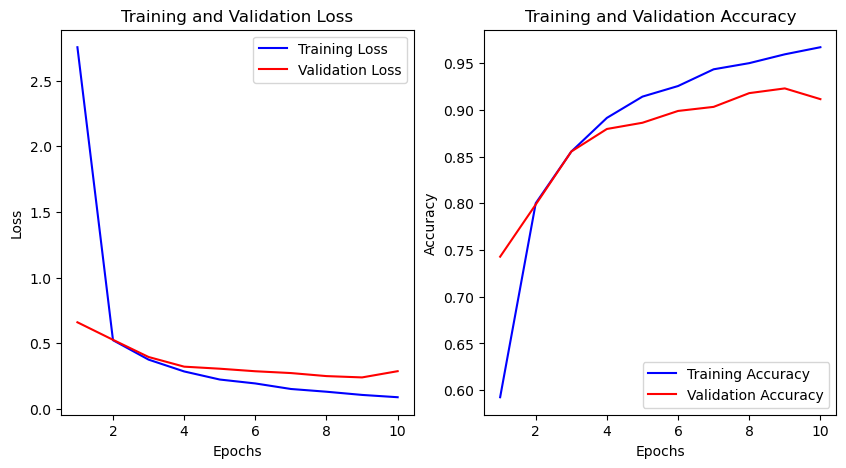

In [ ]:
plot_learning_curve(history_rn50)

In [ ]:
test_ = input_precessor(preprocess_function, test_dataset)

# Extract predictions and true labels
predictions = rn50_model.predict(test_)
# Convert predictions and true labels to class indices
predicted_classes = tf.argmax(predictions, axis=1)



47/47 [==============================] - 23s 493ms/step - loss: 0.3169 - accuracy: 0.9037


In [ ]:
true_labels = tf.concat([y for _, y in test_], axis=0)
# Convert predictions and true labels to class indices
true_classes = tf.argmax(true_labels, axis=1)

Classification Report:
                         precision    recall  f1-score   support

Denoising_diffusion_gan       0.84      0.94      0.89      1000
             Gansformer       0.95      0.95      0.95      1000
                Palette       0.98      0.77      0.86      1000
                   Real       0.82      0.91      0.86      1000
                   Sfhq       0.96      0.98      0.97      1000
              Stylegan1       0.90      0.86      0.88      1000

               accuracy                           0.90      6000
              macro avg       0.91      0.90      0.90      6000
           weighted avg       0.91      0.90      0.90      6000

Confusion Matrix:
[[943   7  16  14   5  15]
 [  1 954   1  24   7  13]
 [169  14 773  37   6   1]
 [  3  14   1 910  11  61]
 [  2   1   0   8 984   5]
 [  4  12   0 113  13 858]]


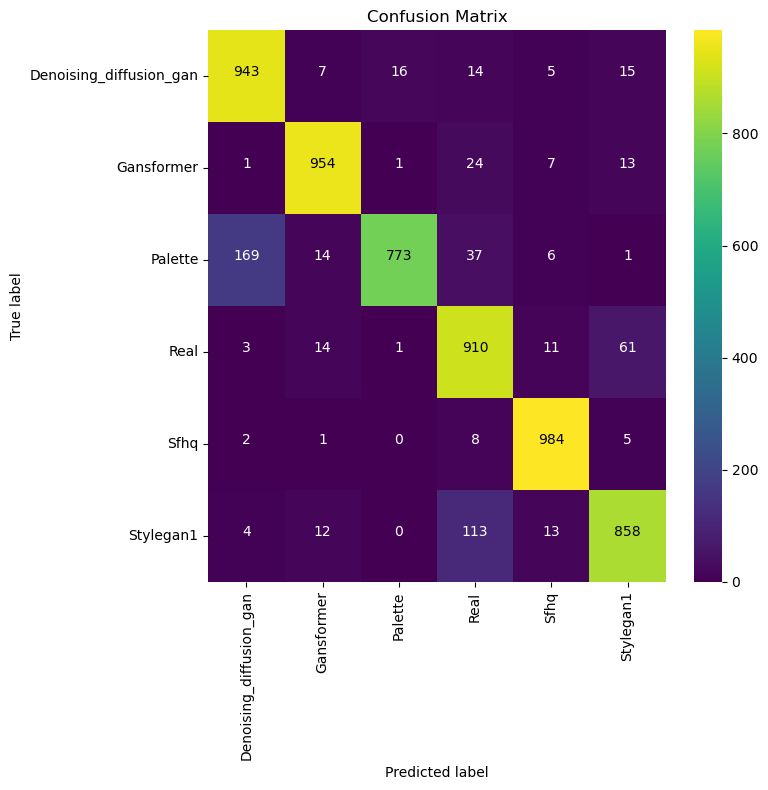

In [ ]:
# class_report
class_report = classification_report(true_classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(class_report)

# confusion_matrix:
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)
cm_display(cm)

In [ ]:
model_path = "models/Resnet50.h5"
rn50_model.save(model_path)

### 6.3.3 Training InceptionV3

In [ ]:
# log: after 20 ep, continue to train for additional 10 epochs, obvious overfitting has been seen after 20 ep
# save the model at ep = 20
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='max')

In [ ]:
inceptionV3_model = create_model(base_model, class_num = 6)
inceptionV3_model.compile(optimizer = Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
preprocess_function = tf.keras.applications.inception_v3.preprocess_input
train_ = input_precessor(preprocess_function, train_data)
val_ = input_precessor(preprocess_function, validation_data)
test_ = input_precessor(preprocess_function, test_dataset)

In [ ]:
# Add early stopping
reduce_lr = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=3)

In [ ]:
initial_epoch = 10
history_inceptionV3= inceptionV3_model.fit(train_, epochs = initial_epoch,  validation_data = val_, shuffle = True, callbacks=[reduce_lr])

Epoch 1/10


2023-11-12 19:43:49.571209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - ETA: 0s - loss: 1.6926 - accuracy: 0.4335

2023-11-12 19:47:29.225646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 236s 669ms/step - loss: 1.6926 - accuracy: 0.4335 - val_loss: 1.1647 - val_accuracy: 0.5476
Epoch 2/10
310/310 [==============================] - 177s 570ms/step - loss: 1.0509 - accuracy: 0.5916 - val_loss: 0.9917 - val_accuracy: 0.6121
Epoch 3/10
310/310 [==============================] - 177s 570ms/step - loss: 0.8795 - accuracy: 0.6569 - val_loss: 0.8387 - val_accuracy: 0.6719
Epoch 4/10
310/310 [==============================] - 176s 566ms/step - loss: 0.7766 - accuracy: 0.6993 - val_loss: 0.7849 - val_accuracy: 0.6949
Epoch 5/10
310/310 [==============================] - 175s 564ms/step - loss: 0.6922 - accuracy: 0.7319 - val_loss: 0.7178 - val_accuracy: 0.7206
Epoch 6/10
310/310 [==============================] - 177s 569ms/step - loss: 0.6238 - accuracy: 0.7580 - val_loss: 0.7216 - val_accuracy: 0.7282
Epoch 7/10
310/310 [==============================] - 182s 585ms/step - loss: 0.5777 - accuracy: 0.7765 - val_loss: 0.6437 - val_accura

In [ ]:
more_epoch = 5
history_more_inceptionV3 = inceptionV3_model.fit(train_, epochs = more_epoch,  validation_data = val_, shuffle = True, callbacks=[reduce_lr])

Epoch 1/5


2023-11-12 23:35:37.997505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - ETA: 0s - loss: 0.2372 - accuracy: 0.9095

2023-11-12 23:39:42.256067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 272s 743ms/step - loss: 0.2372 - accuracy: 0.9095 - val_loss: 0.5646 - val_accuracy: 0.8205
Epoch 2/5
310/310 [==============================] - 180s 578ms/step - loss: 0.2307 - accuracy: 0.9117 - val_loss: 0.5872 - val_accuracy: 0.8224
Epoch 3/5
310/310 [==============================] - 177s 568ms/step - loss: 0.2175 - accuracy: 0.9172 - val_loss: 0.5504 - val_accuracy: 0.8235
Epoch 4/5
310/310 [==============================] - 266s 859ms/step - loss: 0.2096 - accuracy: 0.9201 - val_loss: 0.5983 - val_accuracy: 0.8228
Epoch 5/5
310/310 [==============================] - 176s 568ms/step - loss: 0.1978 - accuracy: 0.9236 - val_loss: 0.5471 - val_accuracy: 0.8346


In [ ]:
for k in history_inceptionV3.history:
    history_inceptionV3.history[k].extend(history_more_inceptionV3.history[k])

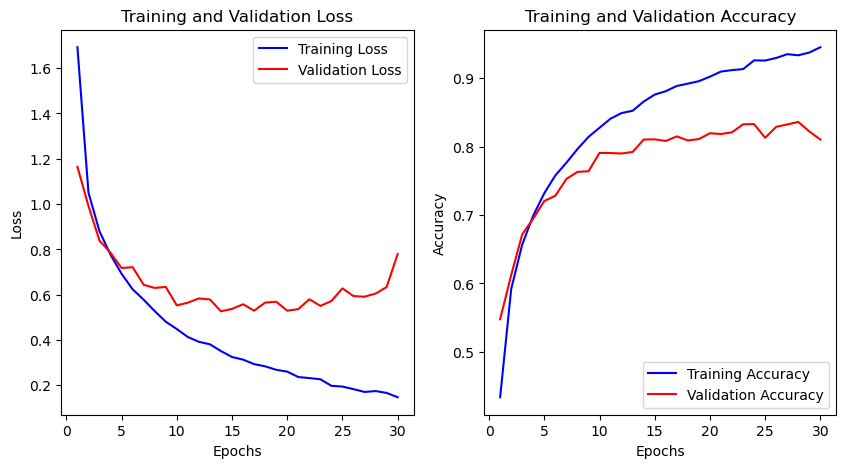

In [ ]:
plot_learning_curve(history_inceptionV3)

47/47 [==============================] - 9s 203ms/step
Classification Report:
                         precision    recall  f1-score   support

Denoising_diffusion_gan       0.73      0.82      0.77      1000
             Gansformer       0.84      0.86      0.85      1000
                Palette       0.85      0.77      0.81      1000
                   Real       0.70      0.76      0.73      1000
                   Sfhq       0.94      0.95      0.94      1000
              Stylegan1       0.80      0.68      0.74      1000

               accuracy                           0.81      6000
              macro avg       0.81      0.81      0.81      6000
           weighted avg       0.81      0.81      0.81      6000

Confusion Matrix:
[[817  16 108  23   7  29]
 [ 21 862   6  70   9  32]
 [179  14 772  28   4   3]
 [ 34  71  15 759  29  92]
 [  9   7   3  18 949  14]
 [ 54  53   5 190  16 682]]


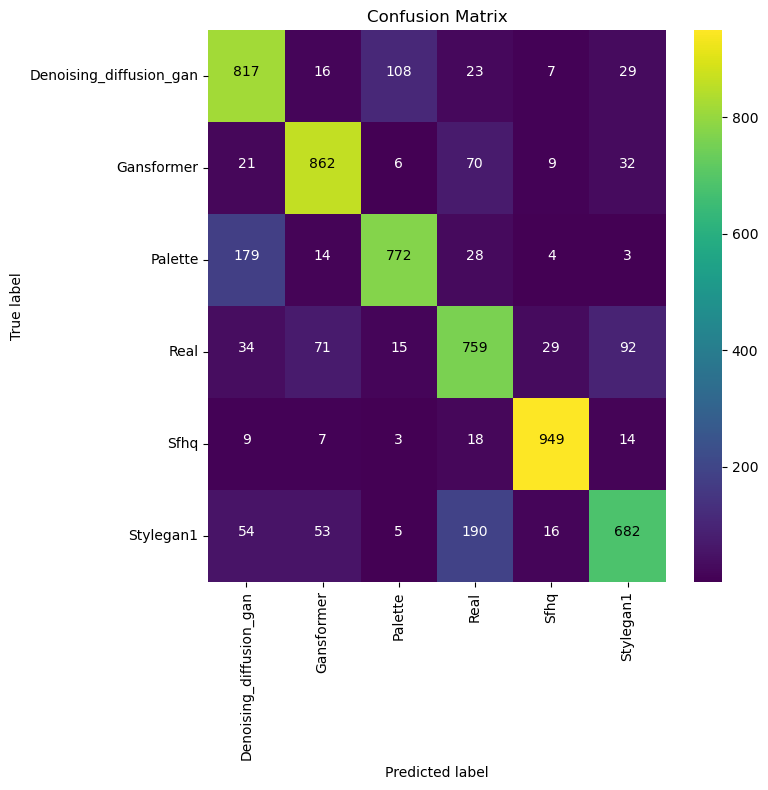

In [ ]:
model_evaluation(inceptionV3_model, test_, true_classes)

In [ ]:
model_path = "models/InceptionV3_25ep.h5"
inceptionV3_model.save(model_path)

### 6.3.4 Training EffecientNet

In [ ]:
# Log:
# if batchnormalization unfrozen, training 1 epoch takes 2:17:05. not feasible.
# if it is not frozen, each epoch takes 240s - 330s, but accuracy growing very slowly.
# at epoch 5, only 0.6609; epoch 10, only 0.7039.

from tensorflow.keras.applications import EfficientNetB4
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=img_shape, pooling='max')
effecientnetb4_model = create_model(base_model, class_num = 6, batchnormalization_layers_trainable = False)
effecientnetb4_model.compile(optimizer = Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
preprocess_function = tf.keras.applications.efficientnet.preprocess_input
train_ = input_precessor(preprocess_function, train_data)
val_ = input_precessor(preprocess_function, validation_data)
test_ = input_precessor(preprocess_function, test_dataset)

In [ ]:
initial_epoch = 10
history_effecientnetb4= effecientnetb4_model.fit(train_, epochs = initial_epoch,  validation_data = val_, shuffle = True, callbacks=[reduce_lr])

Epoch 1/10


2023-11-12 21:42:08.126510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - ETA: 0s - loss: 1.4467 - accuracy: 0.5102

2023-11-12 21:46:51.235437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 341s 968ms/step - loss: 1.4467 - accuracy: 0.5102 - val_loss: 1.0295 - val_accuracy: 0.5905
Epoch 2/10
310/310 [==============================] - 237s 765ms/step - loss: 1.0103 - accuracy: 0.6011 - val_loss: 0.9283 - val_accuracy: 0.6296
Epoch 3/10
310/310 [==============================] - 238s 766ms/step - loss: 0.9252 - accuracy: 0.6339 - val_loss: 0.9826 - val_accuracy: 0.6002
Epoch 4/10
310/310 [==============================] - 241s 776ms/step - loss: 0.8817 - accuracy: 0.6533 - val_loss: 0.8833 - val_accuracy: 0.6455
Epoch 5/10
310/310 [==============================] - 240s 774ms/step - loss: 0.8574 - accuracy: 0.6609 - val_loss: 0.8349 - val_accuracy: 0.6801
Epoch 6/10
310/310 [==============================] - 239s 771ms/step - loss: 0.8313 - accuracy: 0.6712 - val_loss: 0.8178 - val_accuracy: 0.6877
Epoch 7/10
310/310 [==============================] - 238s 769ms/step - loss: 0.8086 - accuracy: 0.6828 - val_loss: 0.8483 - val_accura

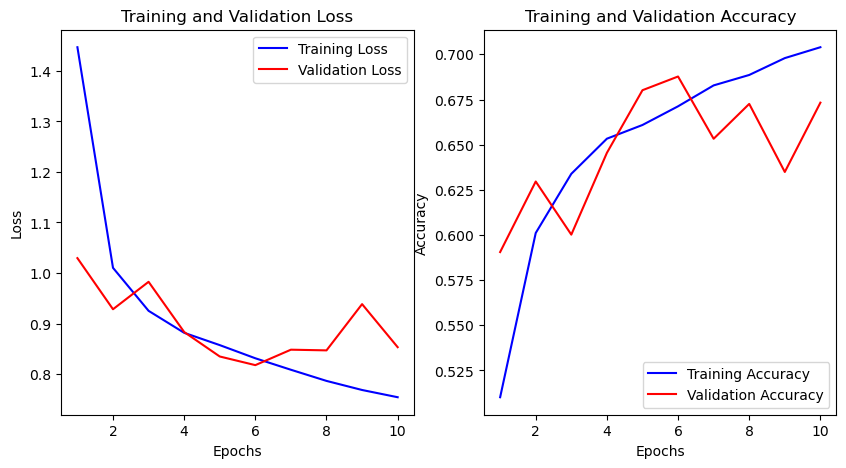

In [ ]:
plot_learning_curve(history_effecientnetb4)

In [ ]:
model_path = "models/EffecientNet_10ep.h5"
effecientnetb4_model.save(model_path)

### 6.3.5 Training  ViT Model

_Note: Since we will extract features from the base-model in the next section, `vit_keras` API is the most convenient one we can find._

In [ ]:
from vit_keras import vit

In [ ]:
vit_b16 = vit.vit_b16(
        image_size = 224,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 6)

/Users/tongju/anaconda3/envs/learn-env/lib/python3.9/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [ ]:
vit_b16.summary()

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 14, 14, 768)       590592    
                                                                 
 reshape_1 (Reshape)         (None, 196, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 197, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 197, 768)         151296    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 197, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [ ]:
vit_model1 = create_model(vit_b16, class_num = 6, batchnormalization_layers_trainable = True)

In [ ]:
vit_model1.compile(optimizer = Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
def vit_preprocess(image):
    image_resized = tf.image.resize(image, (224, 224))
    image_resized = tf.cast(image_resized, tf.float32)
    image_resized = (image_resized - 127.5) / 127.5
    return image_resized

In [ ]:
preprocess_function = vit_preprocess
train_ = input_precessor(preprocess_function, train_data)
val_ = input_precessor(preprocess_function, validation_data)
test_ = input_precessor(preprocess_function, test_dataset)

In [ ]:
# Observations: each epoch takes around 690 s
# overfitting found after epoch 12-13, further training cannot enhance the test accuracy
# save model at epoch 12
# at epoch 10
# Denoising_diffusion_gan       0.81
# Stylegan1       0.80
# at epoch 12
# Denoising_diffusion_gan   0.85
# Stylegan1   0.66

# So why Stylegan1 can witness lower precision, because it is more easier to be overfitted than other types.

initial_epoch = 5
history_vit_model1 = vit_model1.fit(train_, epochs = initial_epoch,  validation_data = val_, shuffle = True, callbacks=[reduce_lr])

Epoch 1/5


2023-11-13 14:34:51.740304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - ETA: 0s - loss: 0.6382 - accuracy: 0.7511

2023-11-13 14:51:47.467059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 1124s 3s/step - loss: 0.6382 - accuracy: 0.7511 - val_loss: 0.5465 - val_accuracy: 0.7845
Epoch 2/5
310/310 [==============================] - 689s 2s/step - loss: 0.4718 - accuracy: 0.8171 - val_loss: 0.4362 - val_accuracy: 0.8267
Epoch 3/5
310/310 [==============================] - 694s 2s/step - loss: 0.4176 - accuracy: 0.8410 - val_loss: 0.4498 - val_accuracy: 0.8254
Epoch 4/5
310/310 [==============================] - 686s 2s/step - loss: 0.3771 - accuracy: 0.8546 - val_loss: 0.3939 - val_accuracy: 0.8470
Epoch 5/5
310/310 [==============================] - 693s 2s/step - loss: 0.3431 - accuracy: 0.8699 - val_loss: 0.3697 - val_accuracy: 0.8617


In [ ]:
more_epoch = 5
more1_vit_model1 = vit_model1.fit(train_, epochs = more_epoch,  validation_data = val_, shuffle = True, callbacks=[reduce_lr])

Epoch 1/5
310/310 [==============================] - 687s 2s/step - loss: 0.3168 - accuracy: 0.8776 - val_loss: 0.3699 - val_accuracy: 0.8619
Epoch 2/5
310/310 [==============================] - 683s 2s/step - loss: 0.2971 - accuracy: 0.8873 - val_loss: 0.3919 - val_accuracy: 0.8566
Epoch 3/5
310/310 [==============================] - 687s 2s/step - loss: 0.2806 - accuracy: 0.8949 - val_loss: 0.3711 - val_accuracy: 0.8663
Epoch 4/5
310/310 [==============================] - 691s 2s/step - loss: 0.2528 - accuracy: 0.9037 - val_loss: 0.3795 - val_accuracy: 0.8711
Epoch 5/5
310/310 [==============================] - 693s 2s/step - loss: 0.2397 - accuracy: 0.9104 - val_loss: 0.3548 - val_accuracy: 0.8711


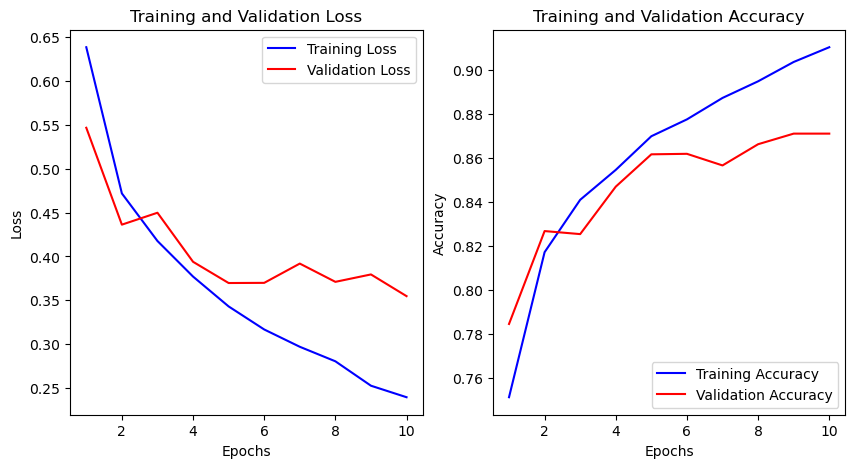

In [ ]:
plot_learning_curve(history_vit_model1)

47/47 [==============================] - 80s 2s/step
Classification Report:
                         precision    recall  f1-score   support

Denoising_diffusion_gan       0.85      0.82      0.84      1000
             Gansformer       0.89      0.87      0.88      1000
                Palette       0.86      0.78      0.82      1000
                   Real       0.81      0.74      0.77      1000
                   Sfhq       0.95      0.98      0.97      1000
              Stylegan1       0.74      0.87      0.80      1000

               accuracy                           0.85      6000
              macro avg       0.85      0.85      0.85      6000
           weighted avg       0.85      0.85      0.85      6000

Confusion Matrix:
[[825  15 112  10   2  36]
 [  2 867   6  43   7  75]
 [124  15 782  49  10  20]
 [  7  50   9 745  17 172]
 [  0   4   0   6 983   7]
 [ 13  27   2  72  14 872]]


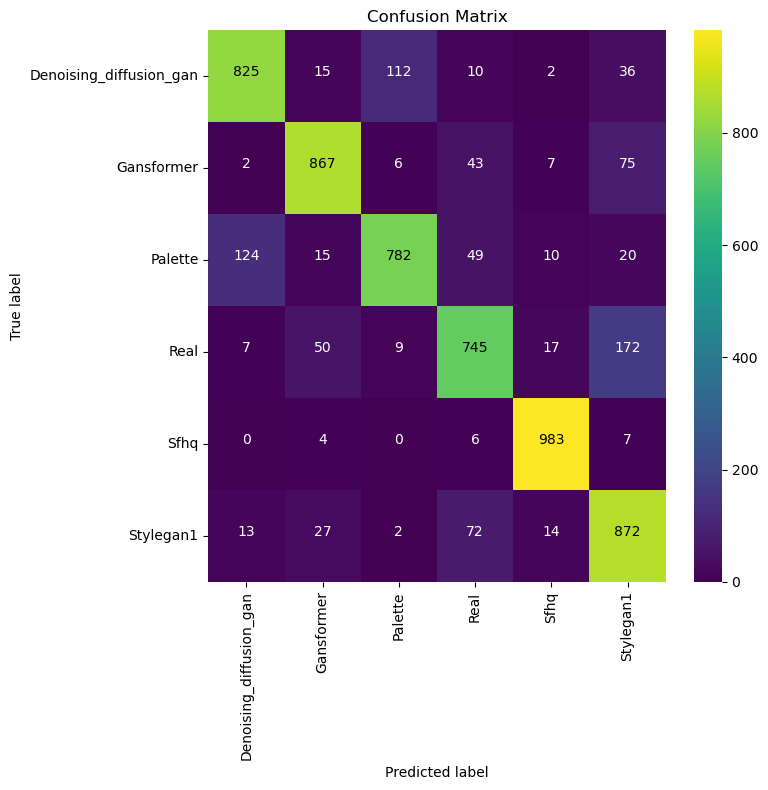

In [ ]:
model_evaluation(vit_model1, test_, true_classes)

### 6.3.6 Training VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=img_shape, pooling='max')
preprocess_function = tf.keras.applications.vgg19.preprocess_input

In [ ]:
vgg19_model = create_model(vgg19_base, class_num = 6, batchnormalization_layers_trainable = True)
vgg19_model.compile(optimizer = Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_ = input_precessor(preprocess_function, train_data)
val_ = input_precessor(preprocess_function, validation_data)
test_ = input_precessor(preprocess_function, test_dataset)

In [ ]:
initial_epoch = 5
history_vgg19 = vgg19_model.fit(train_, epochs = initial_epoch,  validation_data = val_, shuffle = True)

Epoch 1/5


2023-11-14 11:50:00.776190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - ETA: 0s - loss: 3.0515 - accuracy: 0.5120

2023-11-14 11:53:49.184243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 255s 813ms/step - loss: 3.0515 - accuracy: 0.5120 - val_loss: 1.5869 - val_accuracy: 0.5630
Epoch 2/5
310/310 [==============================] - 250s 805ms/step - loss: 1.1860 - accuracy: 0.6072 - val_loss: 1.2277 - val_accuracy: 0.5855
Epoch 3/5
310/310 [==============================] - 255s 821ms/step - loss: 0.9107 - accuracy: 0.6655 - val_loss: 1.0790 - val_accuracy: 0.6195
Epoch 4/5
310/310 [==============================] - 249s 803ms/step - loss: 0.7773 - accuracy: 0.7104 - val_loss: 1.0340 - val_accuracy: 0.6294
Epoch 5/5
310/310 [==============================] - 250s 803ms/step - loss: 0.6757 - accuracy: 0.7477 - val_loss: 1.0244 - val_accuracy: 0.6443


In [ ]:
more = 15
more = vgg19_model.fit(train_, epochs = more,  validation_data = val_, shuffle = True)

Epoch 1/15
310/310 [==============================] - 250s 804ms/step - loss: 0.6037 - accuracy: 0.7746 - val_loss: 1.0489 - val_accuracy: 0.6448
Epoch 2/15
310/310 [==============================] - 249s 802ms/step - loss: 0.5401 - accuracy: 0.8005 - val_loss: 1.0347 - val_accuracy: 0.6572
Epoch 3/15
310/310 [==============================] - 2050s 7s/step - loss: 0.4833 - accuracy: 0.8228 - val_loss: 1.1053 - val_accuracy: 0.6505
Epoch 4/15
310/310 [==============================] - 2871s 9s/step - loss: 0.4322 - accuracy: 0.8407 - val_loss: 1.1132 - val_accuracy: 0.6716
Epoch 5/15
310/310 [==============================] - 250s 806ms/step - loss: 0.3921 - accuracy: 0.8547 - val_loss: 1.1620 - val_accuracy: 0.6705
Epoch 6/15
310/310 [==============================] - 250s 805ms/step - loss: 0.3530 - accuracy: 0.8711 - val_loss: 1.2097 - val_accuracy: 0.6613
Epoch 7/15
310/310 [==============================] - 251s 807ms/step - loss: 0.3269 - accuracy: 0.8812 - val_loss: 1.2473 - val

In [ ]:
for k in history_vgg19.history:
    history_vgg19.history[k].extend(more.history[k])

In [ ]:
plot_learning_curve(history_vgg19)

In [ ]:
model_evaluation(vgg19_model, test_, true_classes)

2023-11-14 14:31:54.138101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 36s 742ms/step
Classification Report:
                         precision    recall  f1-score   support

Denoising_diffusion_gan       0.49      0.61      0.54      1000
             Gansformer       0.68      0.39      0.50      1000
                Palette       0.55      0.43      0.49      1000
                   Real       0.43      0.55      0.48      1000
                   Sfhq       0.87      0.90      0.88      1000
              Stylegan1       0.52      0.56      0.54      1000

               accuracy                           0.57      6000
              macro avg       0.59      0.58      0.57      6000
           weighted avg       0.59      0.57      0.57      6000

Confusion Matrix:
[[613  20 181 115  24  47]
 [109 393  44 227  35 192]
 [336  40 435 115  21  53]
 [ 95  67  69 548  16 205]
 [ 28  14  14  24 898  22]
 [ 74  47  44 231  41 563]]


### Result Summary

As shown above, the highest overall accuracy score of 0.91 is obtained by ResNet50 model. Although in this section, we use other version of ViT model, namely, ViT-b16, it performs well on the ArtiFact dataset with the second highest score of 0.85, followed by Inception-V3 model with accuracy of 0.81. However, VGG19 and EffecientNetB4 only shows lower accuracy on the validation dataset. Therefore, in section 6.4, we concentrate our efforts on feature extraction by using top 3 models we trained in this section.







## 6.4 Feature Extraction

We have selected the trained models with overall accuracy above 80%. In this section, we experiment on the technology of feature extraction. Here, we have the following hypothesis:

* H1: _Classification by using the extracted features should offer the similar results of the above CNN models_.

* H2: _Combining features from various models may enhance the overall accuracy of the classifier, and the approach of hybrid model may give a better result than the individual models_.

As previous research work suggested, the ReLu25 ('conv4_block1_out') and ReLu34 ('conv4_block4_out') layers of ResNet50, and final max pooling layer ('mixed10') of Inception-V3 are used to establish the feature extraction models. Restricted to the model API of ViT-b16, only the final pooling layer ('ExtractToken' layer) can be accessed and used to do feature extarction.

In addition, we perform average gloabl pooling on the features extracted from ResNet50 and Inception-V3 to reduce the dimension. Finally, feature vectors with dimension of 1024, 1024, 2048 and 768 are obtained for ResNet50-ReLu25, -ReLu34, Inception-V3 and ViT-b16, respectively. We train SVM classifiers by using the extracted features from training dataset, and validate their performance on the test dataset (_Note: to avoid the memory overflow, we fed the feature extractors with a much smaller batch than that in model training_)



In [ ]:
# Load Models locally
from vit_keras import vit # it is necessary when you load the vit_keras models.

resnet50_path = "models/Resnet50.h5"
inceptionV3_path = "models/InceptionV3_20ep.h5"
vit16_path = "models/Vitb16_12ep.h5"

resnet50_model = tf.keras.models.load_model(resnet50_path)
inceptionV3_model = tf.keras.models.load_model(inceptionV3_path)
vit_model = tf.keras.models.load_model(vit16_path)

In [ ]:
# Load input preprocess functions
def vit_preprocess(image):
    image_resized = tf.image.resize(image, (224, 224))
    image_resized = tf.cast(image_resized, tf.float32)
    image_resized = (image_resized - 127.5) / 127.5
    return image_resized

vit_prep = vit_preprocess
icp_prep = tf.keras.applications.inception_v3.preprocess_input
resnet_prep = tf.keras.applications.resnet50.preprocess_input


In [ ]:
# Resnet50: Relu25 and Relu34 (as normally paper has done)
base_model = resnet50_model
resnet50_relu25 = Model(inputs = base_model.input, outputs = base_model.get_layer('conv4_block1_out').output) # Resnet50 Relu25
resnet50_relu34 = Model(inputs = base_model.input, outputs = base_model.get_layer('conv4_block4_out').output) # Resnet50 Relu34

# InceptionV3:
base_model = inceptionV3_model
icv3_mixed5 = Model(inputs = base_model.input, outputs = base_model.get_layer('mixed5').output)
icv3_mixed7 = Model(inputs = base_model.input, outputs = base_model.get_layer('mixed7').output)
icv3_mixed10 = Model(inputs = base_model.input, outputs = base_model.get_layer('mixed10').output)

# Vit: 'ExtractToken' layer
base_model = vit_model
vit_token = Model(inputs = base_model.input, outputs = base_model.get_layer('ExtractToken').output)

In [ ]:
# To avoid memory overflow, we need to reload data in a much smaller batch size (Otherwise, kernal will be dead!)

# Data loading
train_directory = 'Face/train'
test_directory = 'Face/test'

BATCH_SIZE = 32
IM_SIZE = 200

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = train_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    image_size= (IM_SIZE,IM_SIZE),
    shuffle=False,
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = test_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    image_size= (IM_SIZE, IM_SIZE),
    shuffle=False,
)

Found 44000 files belonging to 6 classes.
Found 6000 files belonging to 6 classes.


In [ ]:
# image preprocessing function (for pre-trained model)
def input_precessor(preprocess_function, data):
    return data.map(lambda x, y: (preprocess_function(x), y))

def extract_features(data, extractor, preprocess_function):
    prep_data = input_precessor(preprocess_function, data)
    features = []
    # Iterate over all batches in the dataset
    for batch_data, _ in prep_data:
        batch_features = extractor.predict(batch_data, verbose=0)
        if batch_features.ndim > 2:
            # get global mean pooling of each extracted tensor
            reduced_batch_features = np.mean(batch_features, axis=(1, 2))
        else:
            reduced_batch_features = batch_features

        features.append(reduced_batch_features)
    return np.concatenate(features, axis=0)


In [ ]:
# extract features from Resnet50 ReLu25 layers
extractor = resnet50_relu25
relu25_train = extract_features(train_dataset, extractor, resnet_prep)

In [ ]:
relu25_train.shape # we have processed 44000 images each one has a feature tensor with 1024 dimension

(44000, 1024)

In [ ]:
relu34_train = extract_features(train_dataset, resnet50_relu34, resnet_prep)

2023-11-14 16:48:21.323274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# combine Resnet50 two features:
resnet_train_features = np.concatenate([relu25_train, relu34_train], axis=1)
resnet_train_features.shape

(44000, 2048)

In [ ]:
# save features
np.save('Resnet50_train_features.npy', resnet_train_features)

In [ ]:
# Extract features by using ViT pre-trained models
vit_train = extract_features(train_dataset, vit_token, vit_prep)

In [ ]:
vit_train.shape

(44000, 768)

In [ ]:
# save features
np.save('ViT_train_features.npy', vit_train)

In [ ]:
# Extract InceptionV3 features
# Rather than using the final global pooling layer (mixed 10) in literatures, we can extract features from mix 5 and mix 7
# mix 4: mixed4 (Concatenate) (None, 10, 10, 768)
# mix 7: mixed7 (Concatenate) (None, 10, 10, 768)
inceptionV3_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 99, 99, 32)   864         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_94 (BatchN  (None, 99, 99, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

 batch_normalization_104 (Batch  (None, 22, 22, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 22, 22, 32)  96          ['conv2d_105[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 22, 22, 64)   0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activation_101 (Activation)    (None, 22, 22, 64)   0           ['batch_normalization_101[0][0]']
                                                                                                  
 activatio

 conv2d_114 (Conv2D)            (None, 22, 22, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 22, 22, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 22, 22, 48)  144         ['conv2d_114[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 22, 22, 96)  288         ['conv2d_117[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 conv2d_128 (Conv2D)            (None, 10, 10, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 10, 10, 128)  384        ['conv2d_128[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 10, 10, 128)  0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_129 (Conv2D)            (None, 10, 10, 128)  114688      ['activation_128[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 activation_138 (Activation)    (None, 10, 10, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 10, 10, 160)  179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 10, 10, 160)  480        ['conv2d_139[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_139 (Activation)    (None, 10, 10, 160)  0           ['batch_normalization_139[0][0]']
                                                                                                  
 conv2d_13

 batch_normalization_149 (Batch  (None, 10, 10, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 10, 10, 160)  0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_145 (Conv2D)            (None, 10, 10, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_150 (Conv2D)            (None, 10, 10, 160)  179200      ['activation_149[0][0]']         
                                                                                                  
 batch_normalization_145 (Batch  (None, 10, 10, 160)  480        ['conv2d_145[0][0]']             
 Normaliza

 conv2d_155 (Conv2D)            (None, 10, 10, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 10, 10, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 10, 10, 192)  576        ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_160 (Batch  (None, 10, 10, 192)  576        ['conv2d_160[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 10, 10, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_164 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_164[0][0]']
                                                                                                  
 activation_168 (Activation)    (None, 10, 10, 192)  0           ['batch_normalization_168[0][0]']
                                                                                                  
 conv2d_165 (Conv2D)            (None, 4, 4, 320)    552960      ['activation_164[0][0]']         
          

                                                                                                  
 activation_176 (Activation)    (None, 4, 4, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 4, 4, 384)    0           ['batch_normalization_177[0][0]']
                                                                                                  
 batch_normalization_178 (Batch  (None, 4, 4, 192)   576         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_170 (Activation)    (None, 4, 4, 320)    0           ['batch_normalization_170[0][0]']
                                                                                                  
 mixed9_0 

 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 4, 4, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 4, 4, 768)    0           ['activation_181[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 concatenate_3 (Concatenate)    (None, 4, 4, 768)    0           ['activation_185[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 activatio

In [ ]:
mixed5_train = extract_features(train_dataset,icv3_mixed5, icp_prep)

2023-11-14 20:33:42.425617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
mixed5_train.shape

(44000, 768)

In [ ]:
mixed7_train = extract_features(train_dataset,icv3_mixed7, icp_prep)

2023-11-14 20:35:02.573785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
mixed7_train.shape

(44000, 768)

In [ ]:
mixed10_train = extract_features(train_dataset,icv3_mixed10, icp_prep)

2023-11-15 13:17:52.424020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
mixed10_train.shape

(44000, 2048)

In [ ]:
np.save('InceptionV3_train_features.npy',icv3_train_features)
np.save('InceptionV3_test_features.npy',icv3_test_features)

## 6.5 Classification by using extracted features

Following the creation of feature extractors, we initially evaluate Hypothesis 1, demonstrating that the SVM classifier, utilizing extracted features, achieves comparable classification results to the original models. For instance, ViT-b16 and Inception-V3 exhibit accuracy scores of 81.8% and 87.2%, respectively.

Surprisingly, with ResNet50, the SVM model using extracted features surpasses the original model, achieving an impressive 95.8% accuracy. This unexpected outcome suggests a potential contribution of lower-level image features, enhancing SVM's ability to discern between AI-generated and authentic images. Consequently, we propose the third hypothesis:

* H3: Lower-level image features likely contribute to the discernment between fake and real images.

Testing this hypothesis for Inception-V3-based feature extractors involves extracting features from two lower-level layers, "mixed4" and "mixed7." This results in an accuracy increase from 81.8% to 90.9% (as seen in Section 6.5.2).

Furthermore, evaluating the impact of combined features from various models reveals promising results. Concatenating ReLu25 and ReLu34 of ResNet50 with the final pooling layer of ViT-b16 yields an accuracy of 95.9% using the SVM classifier (Section 6.5.4). Additionally, using feature maps from four lower-level layers of ResNet50 and Inception-V3 elevates the overall accuracy to 96.7% (Section 6.5.5).

Attempting to reduce feature map dimensionality through univariate feature selection with 1000 or 1500 features does not improve SVM classifier accuracies beyond the original (Section 6.5.6).

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_labels = tf.concat([y for _, y in train_dataset], axis=0)
train_classes = tf.argmax(train_labels , axis=1)

In [ ]:
true_labels = tf.concat([y for _, y in test_dataset], axis=0)
# Convert predictions and true labels to class indices
true_classes = tf.argmax(true_labels, axis=1)

### 6.5.1 Validation of Resnet50 extracted features by using SVM

In [ ]:
clf = svm.SVC(kernel='poly', degree=3, C=900)
clf.fit(resnet_train_features, train_classes)

SVC(C=900, kernel='poly')

In [ ]:
# Similarly extract and combine features of test dataset
relu25_test = extract_features(test_dataset, resnet50_relu25, resnet_prep)
relu34_test = extract_features(test_dataset, resnet50_relu34, resnet_prep)
resnet_test_features = np.concatenate([relu25_test, relu34_test], axis=1)

2023-11-14 17:14:52.128295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-11-14 17:15:11.885170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
np.save('resnet_test_features.npy', resnet_test_features)

In [ ]:
Y_pred = clf.predict(resnet_test_features)
accuracy = accuracy_score(true_classes, Y_pred)
report = classification_report(true_classes, Y_pred)
confusion = confusion_matrix(true_classes, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.958
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1000
           1       0.98      0.97      0.98      1000
           2       0.96      0.93      0.95      1000
           3       0.94      0.93      0.93      1000
           4       0.99      0.99      0.99      1000
           5       0.94      0.95      0.95      1000

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

Confusion Matrix:
[[971   1  26   2   0   0]
 [  2 974   0   9   5  10]
 [ 62   1 929   8   0   0]
 [  6   6   7 928   6  47]
 [  0   0   0   3 994   3]
 [  1   8   1  37   1 952]]


In [ ]:
class_names = train_dataset.class_names
cm_display(confusion)

### 6.5.2 Validation of InceptionV3 extracted features

_In the original model, the highest overall accuracy is only 0.81; We tried to extract features from the final pooling layer, and then do the classification by using SVM, the final accuracy is 0.818._

In [ ]:
mixed10_test = extract_features(test_dataset,icv3_mixed10, icp_prep)

2023-11-15 13:20:41.776173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
clf_mixed10 = svm.SVC(kernel='poly', degree=3, C=900)
clf_mixed10.fit(mixed10_train, train_classes)

SVC(C=900, kernel='poly')

Accuracy: 0.818
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      1000
           1       0.91      0.81      0.86      1000
           2       0.85      0.79      0.82      1000
           3       0.71      0.78      0.74      1000
           4       0.94      0.95      0.95      1000
           5       0.77      0.75      0.76      1000

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000

Confusion Matrix:
[[832   7 106  24   9  22]
 [ 30 808  10  87  11  54]
 [172   6 789  25   2   6]
 [ 30  32  16 776  22 124]
 [  5   4   2  17 950  22]
 [ 40  27   6 161  13 753]]


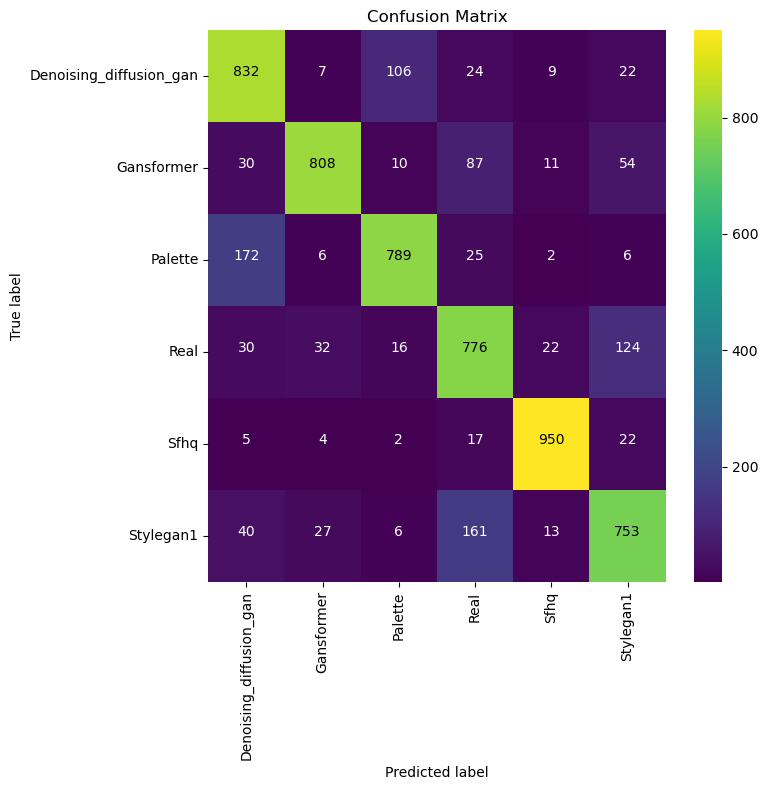

In [ ]:
Y_pred = clf_mixed10.predict(mixed10_test)
accuracy = accuracy_score(true_classes, Y_pred)
report = classification_report(true_classes, Y_pred)
confusion = confusion_matrix(true_classes, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(confusion)
cm_display(confusion)

_However, when we extract "deep features" of mixed5 and mixed7 Concat layers, by using SVM, the accuracy is significantly increased to 0.91._

In [ ]:
mixed5_test = extract_features(test_dataset,icv3_mixed5, icp_prep)
mixed7_test = extract_features(test_dataset,icv3_mixed7, icp_prep)

2023-11-14 20:37:11.382545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-11-14 20:37:28.233191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# together we have a combined feature of 768 + 768 = 1536 dimensions
icv3_train_features = np.concatenate([mixed5_train, mixed7_train], axis=1)
icv3_test_features = np.concatenate([mixed5_test, mixed7_test], axis=1)

In [ ]:
clf_icv3 = svm.SVC(kernel='poly', degree=3, C=900)
clf_icv3.fit(icv3_train_features, train_classes)

SVC(C=900, kernel='poly')

Accuracy: 0.9086666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1000
           1       0.97      0.93      0.95      1000
           2       0.92      0.85      0.88      1000
           3       0.86      0.88      0.87      1000
           4       0.98      0.98      0.98      1000
           5       0.91      0.89      0.90      1000

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000

Confusion Matrix:
[[915   1  60  16   2   6]
 [  8 932   5  38   4  13]
 [125   2 851  17   3   2]
 [ 18  13  11 884   6  68]
 [  4   1   1   8 982   4]
 [ 26  10   2  70   4 888]]


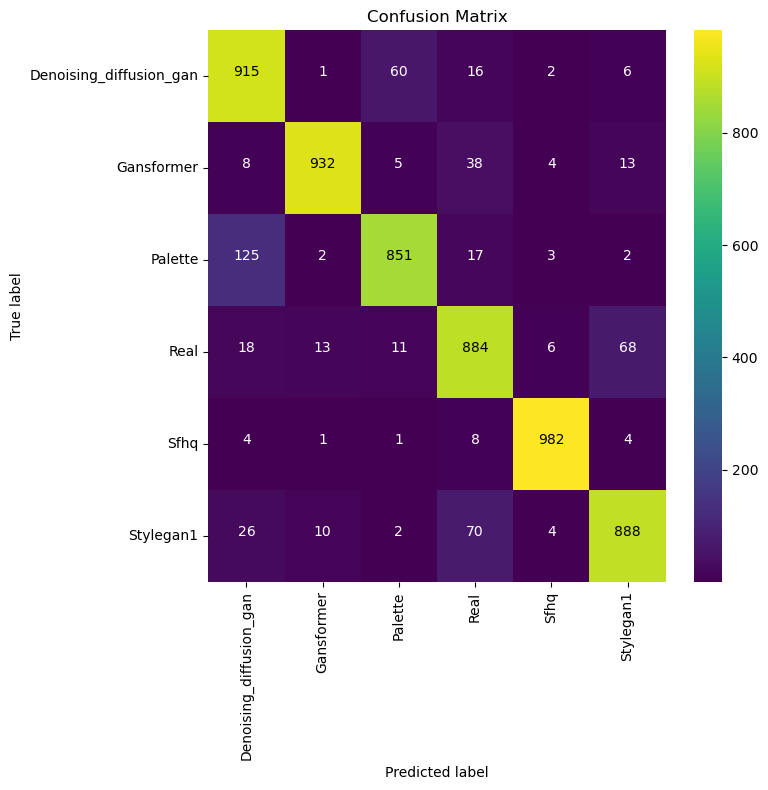

In [ ]:
Y_pred = clf_icv3.predict(icv3_test_features)
accuracy = accuracy_score(true_classes, Y_pred)
report = classification_report(true_classes, Y_pred)
confusion = confusion_matrix(true_classes, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(confusion)
cm_display(confusion)

### 6.5.3 Validation of ViT extracted features

In [ ]:
# Note: it will take rather long time to build SVM
clf_vit = svm.SVC(kernel='poly', degree=3, C=900)
clf_vit.fit(vit_train, train_classes)

SVC(C=900, kernel='poly')

In [ ]:
vit_test = extract_features(test_dataset, vit_token, vit_prep)

2023-11-14 17:37:11.083702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
np.save('vit_test_features.npy', vit_test)

In [ ]:
Y_pred = clf_vit.predict(vit_test)
accuracy = accuracy_score(true_classes, Y_pred)
report = classification_report(true_classes, Y_pred)
confusion = confusion_matrix(true_classes, Y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(confusion)
class_names = train_dataset.class_names
cm_display(confusion)

Accuracy: 0.8721666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1000
           1       0.94      0.82      0.88      1000
           2       0.90      0.80      0.85      1000
           3       0.75      0.85      0.80      1000
           4       0.97      0.98      0.98      1000
           5       0.85      0.85      0.85      1000

    accuracy                           0.87      6000
   macro avg       0.88      0.87      0.87      6000
weighted avg       0.88      0.87      0.87      6000

Confusion Matrix:
[[921   3  60   8   1   7]
 [  9 818   6 112   8  47]
 [118   6 804  58   6   8]
 [ 13  27  13 855   6  86]
 [  1   2   2   4 983   8]
 [ 24  12   6  96  10 852]]


### 6.5.4 SVM classification by using features extracted from ViT and ResNet50

In [ ]:
# concatenate ResNet50 and ViT features
ViT_resnet50_train_features =  np.concatenate([resnet_train_features,vit_train], axis=1)
ViT_resnet50_test_features = np.concatenate([resnet_test_features,vit_test], axis=1)

In [ ]:
# Taken together, we have 2048 + 768 = 2816 dimensions
ViT_resnet50_train_features.shape

(44000, 2816)

In [ ]:
clf_vit_resnet50 = svm.SVC(kernel='poly', degree=3, C=900)
clf_vit_resnet50.fit(ViT_resnet50_train_features, train_classes)

SVC(C=900, kernel='poly')

In [ ]:
Y_pred = clf_vit_resnet50.predict(ViT_resnet50_test_features)
accuracy = accuracy_score(true_classes, Y_pred)
report = classification_report(true_classes, Y_pred)
confusion = confusion_matrix(true_classes, Y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(confusion)
class_names = train_dataset.class_names
cm_display(confusion)

Accuracy: 0.9586666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1000
           1       0.99      0.97      0.98      1000
           2       0.96      0.94      0.95      1000
           3       0.93      0.94      0.94      1000
           4       0.99      0.99      0.99      1000
           5       0.95      0.94      0.94      1000

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

Confusion Matrix:
[[966   0  31   1   0   2]
 [  1 972   0  14   3  10]
 [ 57   0 938   4   1   0]
 [  2   9   5 944   7  33]
 [  1   0   0   1 994   4]
 [  6   1   2  49   4 938]]


### 6.5.5 SVM classification by using features extracted from ResNet50 and InceptionV3

In [ ]:
resnet50_inceptionv3_train_features =  np.concatenate([resnet_train_features, icv3_train_features], axis=1)
resnet50_inceptionv3_test_features = np.concatenate([resnet_test_features,icv3_test_features], axis=1)

In [ ]:
resnet50_inceptionv3_train_features.shape

(44000, 3584)

In [ ]:
clf_resnet50_inceptionv3 = svm.SVC(kernel='poly', degree=3, C=900)
clf_resnet50_inceptionv3.fit(resnet50_inceptionv3_train_features, train_classes)

SVC(C=900, kernel='poly')

In [ ]:
Y_pred = clf_resnet50_inceptionv3.predict(resnet50_inceptionv3_test_features)
accuracy = accuracy_score(true_classes, Y_pred)
report = classification_report(true_classes, Y_pred)
confusion = confusion_matrix(true_classes, Y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(confusion)
class_names = train_dataset.class_names
cm_display(confusion)

Accuracy: 0.9668333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1000
           1       0.99      0.98      0.98      1000
           2       0.98      0.94      0.96      1000
           3       0.95      0.95      0.95      1000
           4       0.99      1.00      1.00      1000
           5       0.95      0.96      0.96      1000

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Confusion Matrix:
[[978   1  19   1   0   1]
 [  2 977   0   9   3   9]
 [ 51   1 942   6   0   0]
 [  3   4   3 946   4  40]
 [  0   0   0   2 997   1]
 [  1   5   2  31   0 961]]


### 6.5.6 Feature Optimization

_In this section, we used the method of univariate feature selection to select best 1500 features. We can see most unique features are selected from ResNet50, and also, the deeper the layer of the features are extraced, the more significant they are._


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_best = SelectKBest(chi2, k = 1500)
fit = k_best.fit(resnet50_inceptionv3_train_features, train_classes)

In [ ]:
feature_dimensions = [1024, 1024, 768, 768]
selected_indices = fit.get_support()
start_index = 0
for i, dim in enumerate(feature_dimensions):
    end_index = start_index + dim
    selected_features_count = np.sum(selected_indices[start_index:end_index])
    print(f"Number of selected features for feature vector {i + 1}: {selected_features_count}")
    start_index = end_index

Number of selected features for feature vector 1: 500
Number of selected features for feature vector 2: 477
Number of selected features for feature vector 3: 332
Number of selected features for feature vector 4: 191


In [ ]:
selected_train_features = resnet50_inceptionv3_train_features[:, selected_indices]
selected_test_features = resnet50_inceptionv3_test_features[:, selected_indices]

In [ ]:
clf_select = svm.SVC(kernel='poly', degree=3, C=900)
clf_select.fit(selected_train_features, train_classes)

SVC(C=900, kernel='poly')

Accuracy: 0.9573333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.99      0.98      0.98      1000
           2       0.96      0.94      0.95      1000
           3       0.93      0.93      0.93      1000
           4       0.99      0.99      0.99      1000
           5       0.94      0.94      0.94      1000

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

Confusion Matrix:
[[962   1  35   1   0   1]
 [  3 978   0   8   3   8]
 [ 53   1 938   8   0   0]
 [  3   6   7 932   6  46]
 [  0   0   0   2 995   3]
 [  2   6   1  51   1 939]]


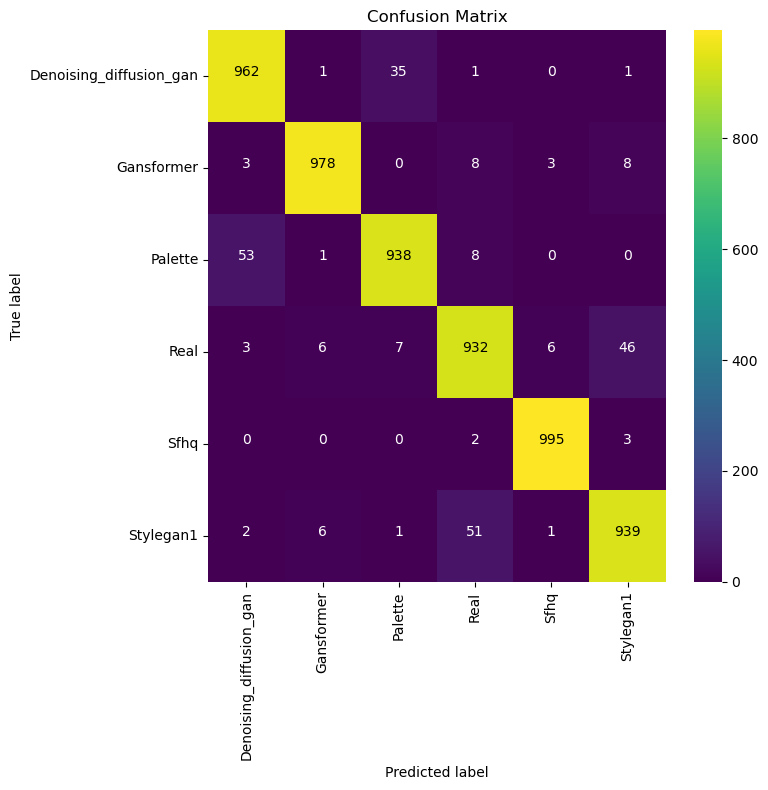

In [ ]:
Y_pred = clf_select.predict(selected_test_features)
accuracy = accuracy_score(true_classes, Y_pred)
report = classification_report(true_classes, Y_pred)
confusion = confusion_matrix(true_classes, Y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(confusion)
class_names = train_dataset.class_names
cm_display(confusion)

# 7. Conclusion

* We started our work from ”simple” binary classification of the real and fake images. However, we found that for some generators, the generated images became quite challenging to be identified. Following the multi-class approach*, we proposed a method that generates multi-class predictions, but finally can be used to improve the performance of binary classification.

* Our experiments have shown the limitations of single pre-trained model for multi-class predictions, and by implementing the feature extraction and combination, plus traditional machine learning methods, we can further improve the model performance, overall accuracy up to 97%, precision up to 99% (for real image).  

* We also found that the deeper the features extracted from a model, the better the predictions will be.

* In future, more work can be done to further improve the model:
    * Experiment on feature extraction of different internal layers of a base-model.
    * More experiments on feature selection, optimization and fusion.
    * Using other machine learning methods and light-DNN.


# Bibliography

A. Dosovitskiy et al., "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale," arXiv preprint arXiv:2010.11929, 2021.

Alzubaidi, L., Zhang, J., Humaidi, A.J. et al. Review of deep learning: concepts, CNN architectures, challenges, applications, future directions. J Big Data 8, 53 (2021). https://doi.org/10.1186/s40537-021-00444-8

<a id="bird-2023"></a>Bird, J. J., & Lotfi, A. (2023). CIFAKE: Image Classification and Explainable Identification of AI-Generated Synthetic Images. https://doi.org/10.48550/arxiv.2303.14126

C. Szegedy, V. Vanhoucke, S. Ioffe, J. Shlens, and Z. Wojna, "Rethinking the inception architecture for computer vision," in Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 2818-2826.

<a id="fox-2023"></a>Fox, M. (2023, November 9). Fake images of the war in Israel and Gaza make it difficult to separate truth from fiction. The Forward. https://forward.com/culture/569109/stock-image-fake-ai-images-israel-gaza-war/

Hazem Munawer Al-Otum, " Deep learning-based automated defect classification in Electroluminescence images of solar panels ", Advanced Engineering Informatics, (2023) 58: 102147.

K. He, X. Zhang, S. Ren, and J. Sun, "Deep residual learning for image recognition," in Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 770-778.

<a id="kriz-2009"></a>Krizhevsky, A. (2009). Learning Multiple Layers of Features from Tiny Images.

<a id="lo-2023"></a>Lo, C (2023, Aug 25). 6 in Hong Kong arrested over use of AI deepfake to apply for loans. (2023, August 25). South China Morning Post. https://www.scmp.com/news/hong-kong/law-and-crime/article/3232273/hong-kong-police-arrest-6-crackdown-fraud-syndicate-using-ai-deepfake-technology-apply-loans

M. D. Zeiler and R. Fergus, "Visualizing and understanding convolutional networks," in European Conference on Computer Vision, 2014, pp. 818-833.

M. Y. Demirci, N. Beşli, and A. Gümüşçü, " Efficient deep feature extraction and classification for identifying defective photovoltaic module cells in Electroluminescence images ", Expert Systems With Applications, (2021) 175: 114810.

<a id="rahman-2023"></a>Md Awsafur Rahman, Paul, B., Najibul Haque Sarker, Hakim, A., & Shaikh Anowarul Fattah. (2023). ArtiFact: A Large-Scale Dataset with Artificial and Factual Images for Generalizable and Robust Synthetic Image Detection. ArXiv (Cornell University). https://doi.org/10.48550/arxiv.2302.11970

S. Pan and Q. Yang, "A survey on transfer learning," IEEE Transactions on Knowledge and Data Engineering, vol. 22, no. 10, pp. 1345-1359, Oct. 2010.

Selvaraju, R. R., Cogswell, M., Das, A., Vedantam, R., Parikh, D., & Batra, D. (2017). Grad-cam: Visual explanations from deep networks via gradient-based localization. In Proceedings of the IEEE international conference on computer vision (pp. 618-626).

Y. Bengio, A. Courville, and P. Vincent, "Representation learning: A review and new perspectives," IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 35, no. 8, pp. 1798-1828, Aug. 2013.


